In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [2]:
from time import time as time
t0 = time()
nfiles = 100
ns_per_sample = 25
window_min = 100
window_max = 500
dwindow = 5

In [3]:
runno = '7487'
Ecut = (200, 600)
nwindow = int((window_min - window_max) / dwindow)

In [4]:
def gauss(x, A, m, s):
    return A*np.exp(-(x-m)**2 / (2*s**2))

def gauss2(x, A, m, v):
    return A*np.exp(-(x-m)**2 / (2*v))

def offset_gauss(x, A, m, v, C):
    return C + A*np.exp(-(x-m)**2 / (2*v))

def const(x, a):
    return a + 0*x

from scipy.optimize import curve_fit

def exp_dt(sig):
    """
    expected drift distance  as a function of sigma of the S2 signal (Zrms from kdst 2018 version)
    parameters from the ad-hoc fit
    """
    p = [-10.00667732,  52.1855012,   12.68195726,  58.66322846, -20.11819297]
    dt = p[0] * sig**4 + p[1] * sig**3 + p[2]*sig**2 + p[3]*sig + p[4]
    return dt

In [5]:
jsondir = '/Volumes/NEXT_data/IC_Data/krThesis/sliding_window_events/variable_window_'+runno+'_json_updated_20201123/'

if nfiles > 0:
    all_jsons = [jsondir+file for file in os.listdir(jsondir)][:nfiles]
else:
    all_jsons = [jsondir+file for file in os.listdir(jsondir)]

In [6]:
all_data = {
    'events_window_maxX' : [],
    'events_window_maxY' : [],
    'events_window_rms' : [],
    'events_window_width' : [],
    'events_window_energy' : [],
    'events_window_charge' : [],
    'events_window_Zrms' : [],
    'events_window_Zgauss' : [],
    'events_window_Wrms' : [],
    'events_window_Wgauss' : [],
    'events_window_GaussOffset' : [],
    'events_prewindow_sums' : [],
    'events_sumwf' : [],
    'events_times' : [],
    'event_numbers' : []
}

n = 0
for filename in all_jsons:
    if n % 10 == 0:
        remaining = (len(all_jsons) - n)*(time() - t0) / (n + 1)
        print(n, '...', round(time() - t0, 1), '; Remaining ~=', round(remaining,1))
    n += 1
    f = open(filename)
    new_dict = json.load(f)
    f.close()
    for k in new_dict.keys():
        all_data[k].extend(new_dict[k])
print('DONE')

0 ... 1.6 ; Remaining ~= 164.5
10 ... 3.8 ; Remaining ~= 30.9
20 ... 5.8 ; Remaining ~= 22.1
30 ... 7.8 ; Remaining ~= 17.6
40 ... 10.0 ; Remaining ~= 14.7
50 ... 12.4 ; Remaining ~= 12.1
60 ... 14.8 ; Remaining ~= 9.7
70 ... 17.2 ; Remaining ~= 7.3
80 ... 19.6 ; Remaining ~= 4.8
90 ... 23.0 ; Remaining ~= 2.5
DONE


In [7]:
events_window_maxX = np.array(all_data['events_window_maxX'])
events_window_maxY = np.array(all_data['events_window_maxY'])
events_window_rms = np.array(all_data['events_window_rms'])
events_window_width = np.array(all_data['events_window_maxX'])
events_window_energy = np.array(all_data['events_window_energy'])
events_window_charge = np.array(all_data['events_window_charge'])
events_window_Zrms = np.array(all_data['events_window_Zrms'])
events_window_Zgauss = np.array(all_data['events_window_Zgauss'])
events_sumwf = np.array(all_data['events_sumwf'])
events_times = np.array(all_data['events_times'])
events_window_Wrms = np.array(all_data['events_window_Wrms'])
events_window_Wgauss = np.array(all_data['events_window_Wgauss'])
events_window_GaussOffset = np.array(all_data['events_window_GaussOffset'])
events_prewindow_sums = np.array(all_data['events_prewindow_sums'])
event_numbers = np.array(all_data['event_numbers'])

In [8]:
print(len(events_window_maxX))
print(len(events_window_maxY))
print(len(events_window_rms))
print(len(events_window_width))
print(len(events_window_energy))
print(len(events_window_charge))
print(len(events_window_Zrms))
print(len(events_sumwf))
print(len(events_times))
print(len(events_window_Wrms))
print(len(events_window_Wgauss))
print(len(events_window_GaussOffset))
print(len(events_prewindow_sums))

print('-------------')
print(len(events_window_maxX[0]))
print(len(events_window_maxY[0]))
print(len(events_window_rms[0]))
print(len(events_window_width[0]))
print(len(events_window_energy[0]))
print(len(events_window_charge[0]))
print(len(events_window_Zrms[0]))
print(len(events_sumwf[0]))
print(len(events_times[0]))

33286
33286
33286
33286
33286
33286
33286
33286
33286
33286
33286
33286
33286
-------------
80
80
80
80
80
80
80
25
25


In [9]:
last_GaussOffset = np.array([ window_GaussOffset[-1] for window_GaussOffset in events_window_GaussOffset ])

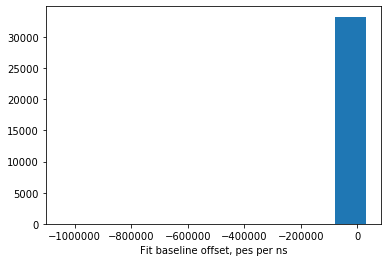

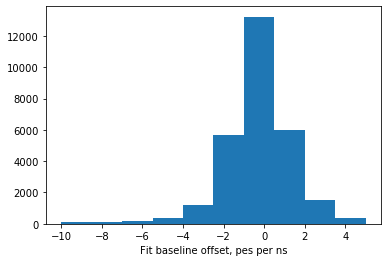

In [10]:
plt.hist(last_GaussOffset)
plt.xlabel('Fit baseline offset, pes per ns')
plt.show()

plt.hist(last_GaussOffset, range=(-10, 5))
plt.xlabel('Fit baseline offset, pes per ns')
plt.show()

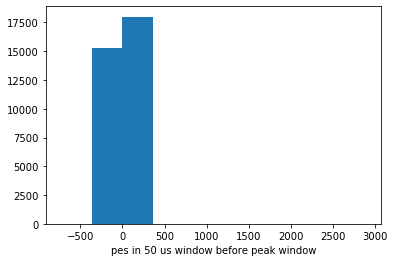

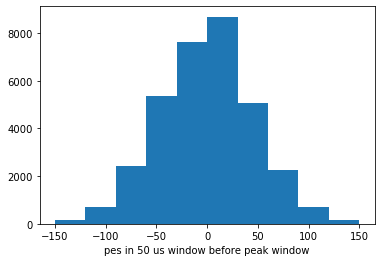

In [11]:
plt.hist(events_prewindow_sums)
plt.xlabel('pes in 50 us window before peak window')
plt.show()

plt.hist(events_prewindow_sums, range=(-150,150))
plt.xlabel('pes in 50 us window before peak window')
plt.show()

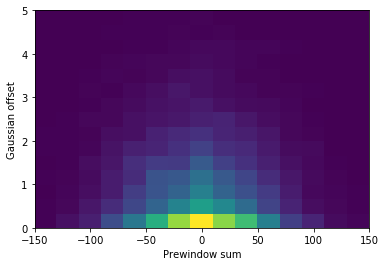

In [12]:
GoodFits = (last_GaussOffset > -1) & (last_GaussOffset < 10)
plt.hist2d(events_prewindow_sums[GoodFits], last_GaussOffset[GoodFits], bins = 15, range = ((-150, 150),(0, 5)))
plt.xlabel('Prewindow sum')
plt.xlim(-150, 150)
plt.ylabel('Gaussian offset')
plt.show()

In [13]:
events_energy = np.array([ events_window_energy[e][-1] for e in range(len(events_window_energy)) ])
events_energy_subtracted = events_energy - events_prewindow_sums
events_window_cut_samples = np.arange(window_min, window_max, dwindow)
events_window_cut = events_window_cut_samples * ns_per_sample * 2
events_window_energy_norm = np.array([ [ peak / max(max(window_energy), 0.1) for peak in window_energy ] for window_energy in events_window_energy ])
events_peaks = np.array([ max(wf) for wf in events_sumwf ])
Emask = (events_energy > Ecut[0]) & (events_energy < Ecut[1])

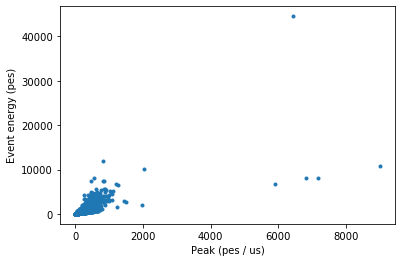

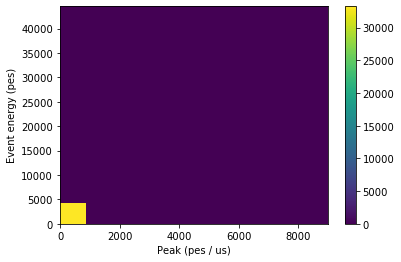

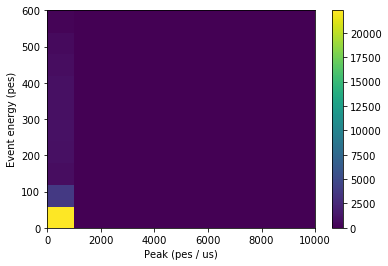

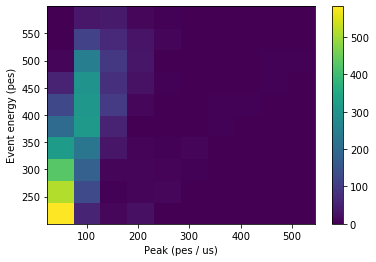

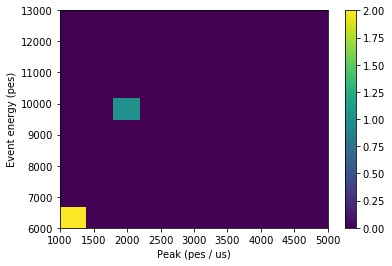

In [14]:
plt.plot(events_peaks, events_energy, '.')
plt.xlabel('Peak (pes / us)')
plt.ylabel('Event energy (pes)')
plt.show()

h = plt.hist2d(events_peaks, events_energy)
plt.xlabel('Peak (pes / us)')
plt.ylabel('Event energy (pes)')
plt.colorbar(h[3])
plt.show()

h = plt.hist2d(events_peaks, events_energy, range = ((0,10000),(0, Ecut[1])) )
plt.xlabel('Peak (pes / us)')
plt.ylabel('Event energy (pes)')
plt.colorbar(h[3])
plt.show()

h = plt.hist2d(events_peaks[Emask], events_energy[Emask])
plt.xlabel('Peak (pes / us)')
plt.ylabel('Event energy (pes)')
plt.colorbar(h[3])
plt.show()

h = plt.hist2d(events_peaks, events_energy, range = ((1000,5000),(6000, 13000)) )
plt.xlabel('Peak (pes / us)')
plt.ylabel('Event energy (pes)')
plt.colorbar(h[3])
plt.show()

Zgauss = -4.399077475984931
Energy = 357.6543046353404


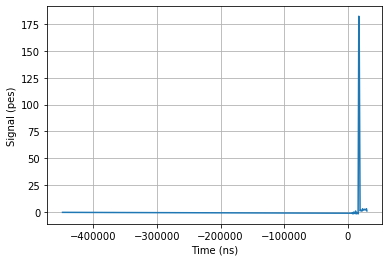

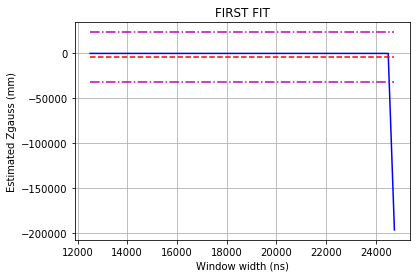

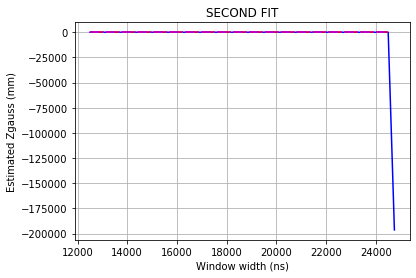

Zgauss = -20.118192586664495
Energy = 411.79925159811046


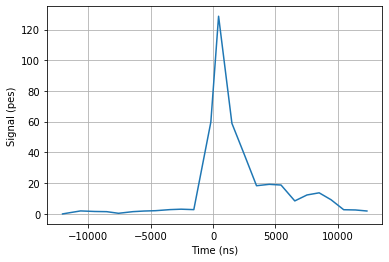

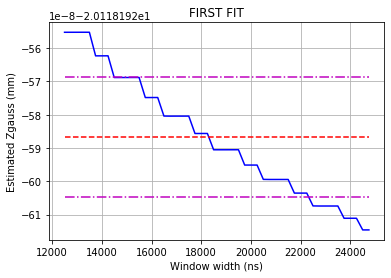

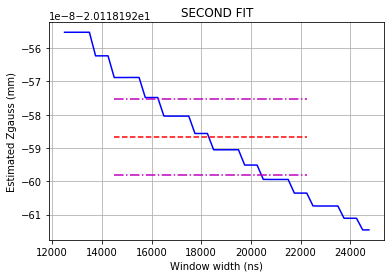

Zgauss = -20.118192542604557
Energy = 431.31400844936735


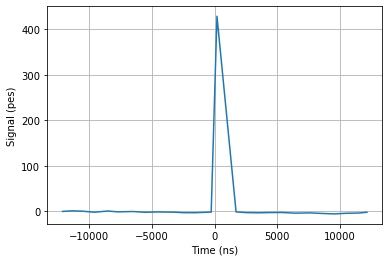

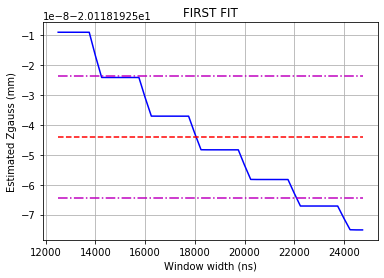

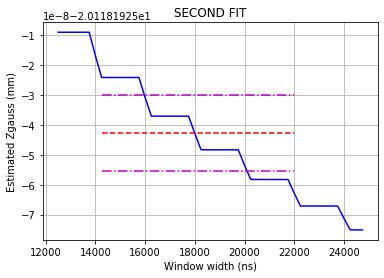

Zgauss = -20.11819252790499
Energy = 473.54173843997336


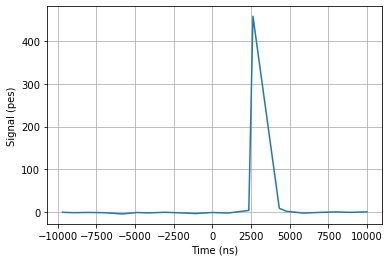

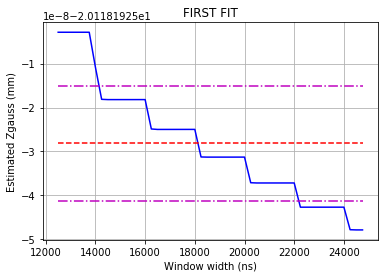

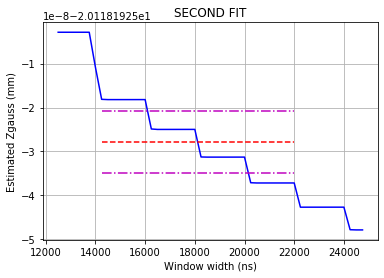

Zgauss = -12.535844505977863
Energy = 504.78250843088097


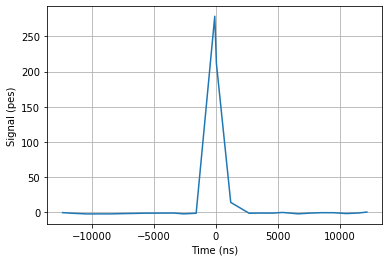

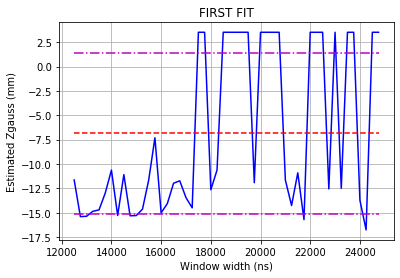

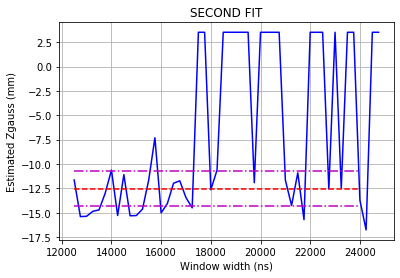

Zgauss = -20.118192732442147
Energy = 243.0753020932991


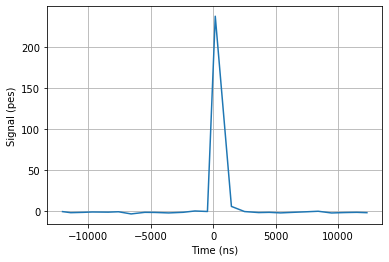

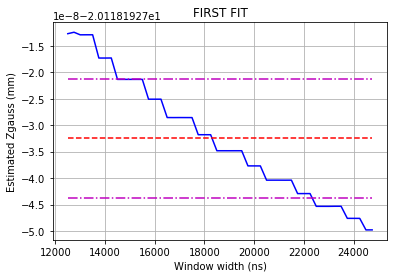

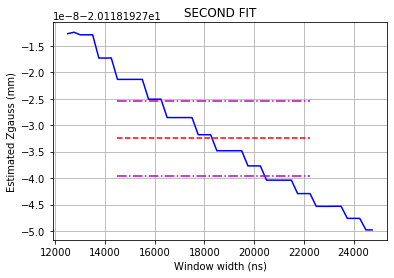

Zgauss = -20.118192836449623
Energy = 294.67047725931917


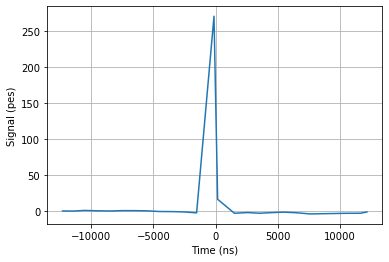

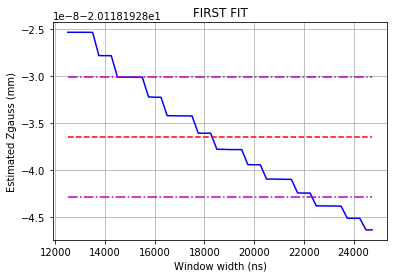

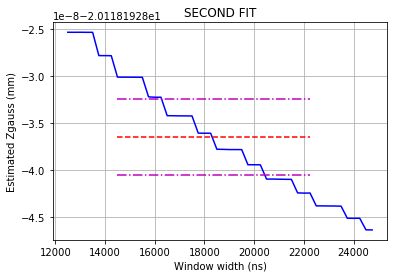

Zgauss = -20.118192644927166
Energy = 431.9608586687321


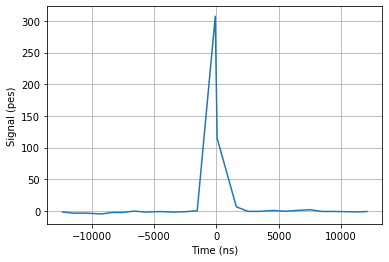

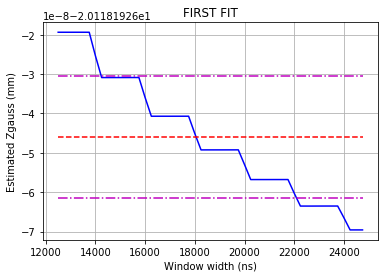

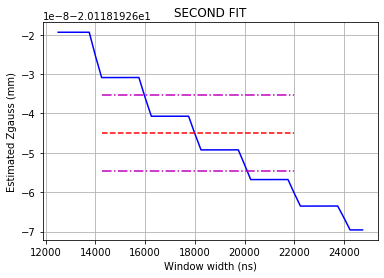

Zgauss = -6731.550327836907
Energy = 431.07016069336515


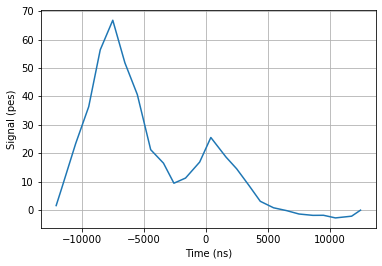

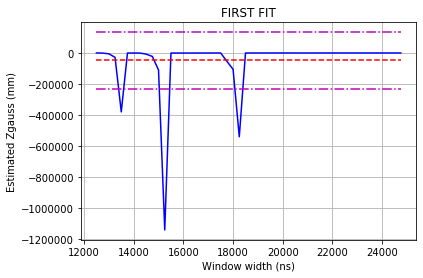

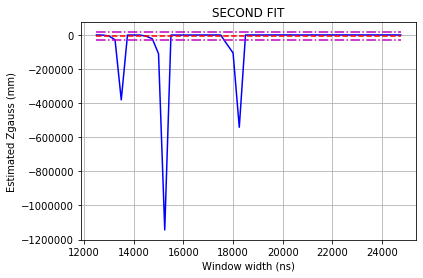

Zgauss = -20.118192646475006
Energy = 278.97347266432536


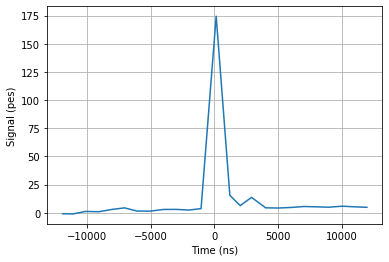

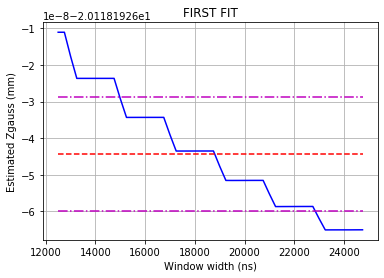

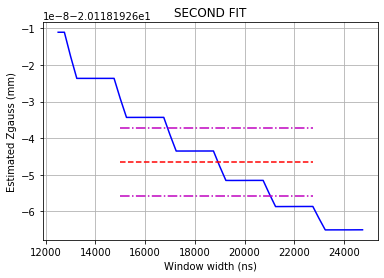

Zgauss = -20.118192917824782
Energy = 296.4650175373837


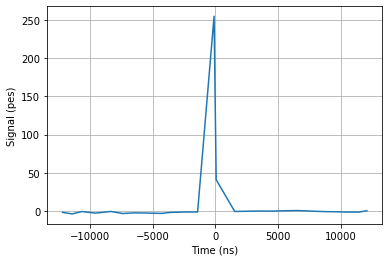

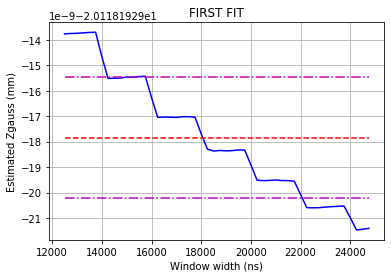

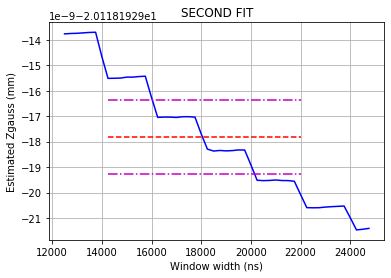

Zgauss = -20.118192707054114
Energy = 558.6929750692032


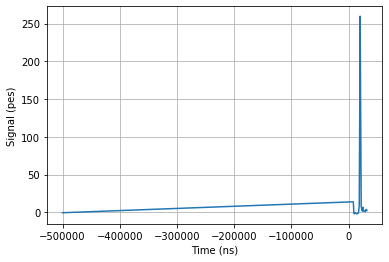

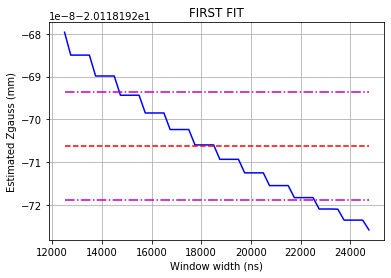

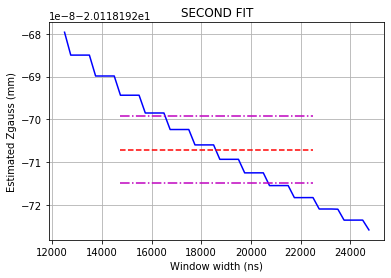

Zgauss = -20.118192608416383
Energy = 500.05471645372165


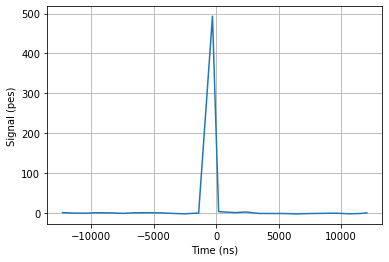

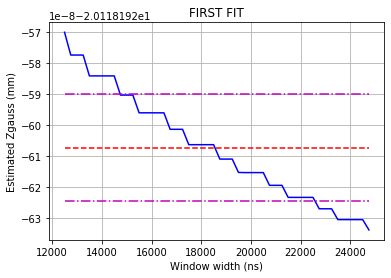

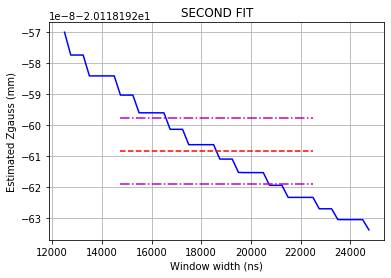

Zgauss = -20.11819270191171
Energy = 232.73569224236525


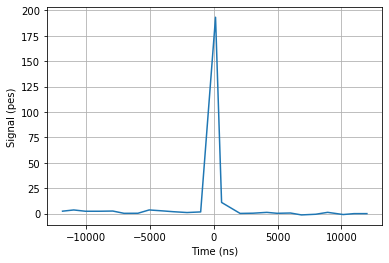

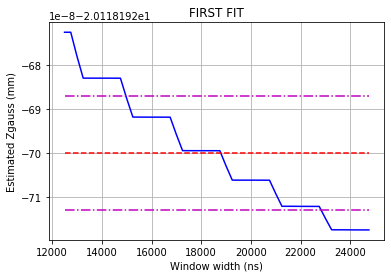

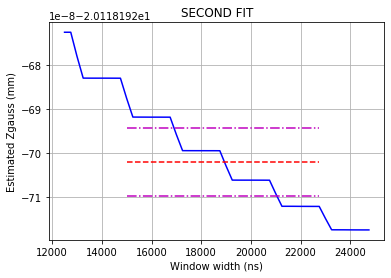

Zgauss = -20.11819261508949
Energy = 279.7446665097794


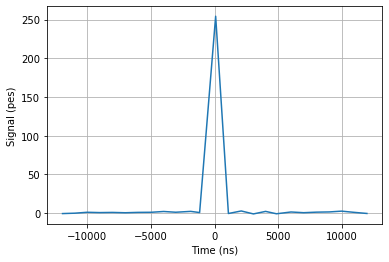

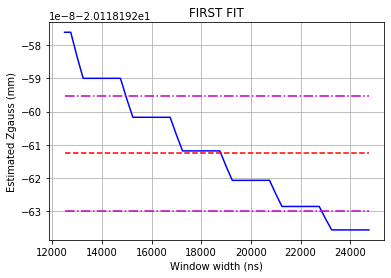

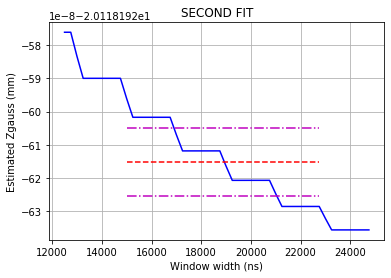

Zgauss = -11.124216256428175
Energy = 218.23248845509724


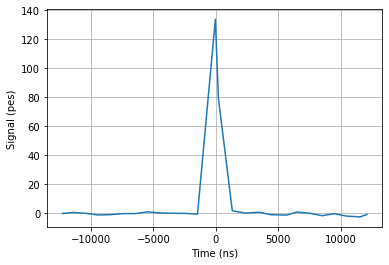

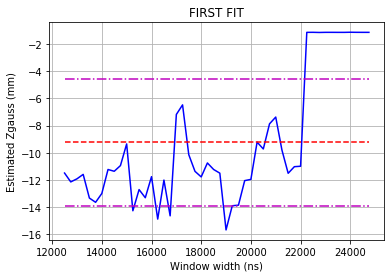

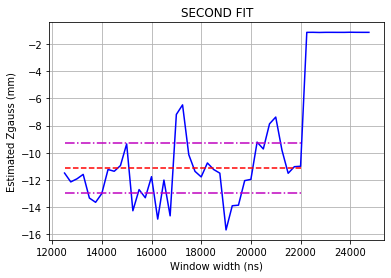

Zgauss = -20.11819281357357
Energy = 349.0766478030094


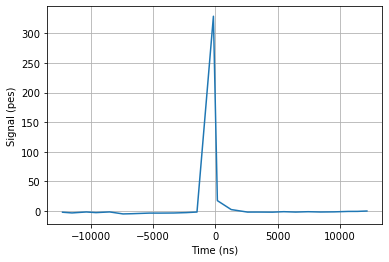

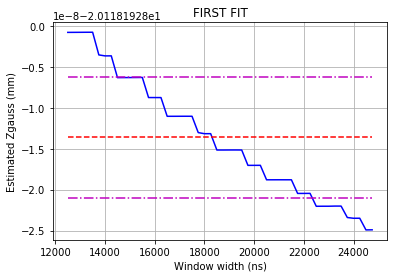

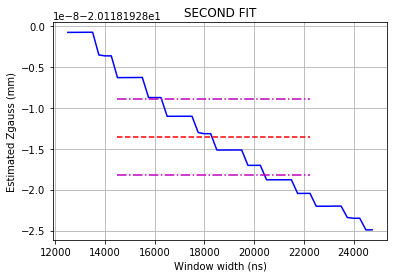

Zgauss = -20.118192609465634
Energy = 548.5321490811781


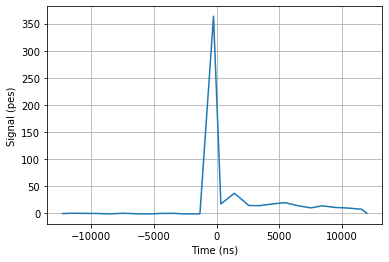

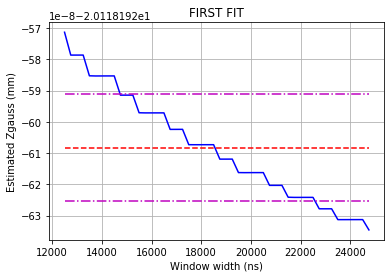

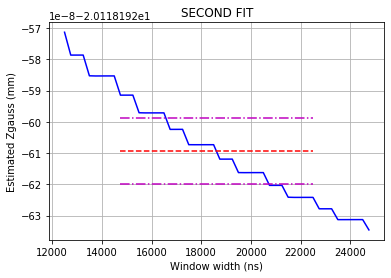

Zgauss = -20.118192790393337
Energy = 259.92324168963216


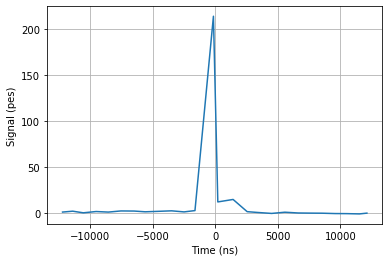

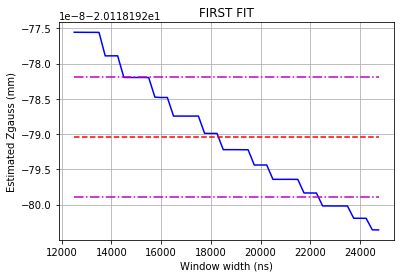

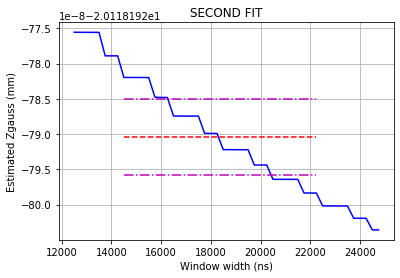

Zgauss = -20.11819262382215
Energy = 222.8189239642692


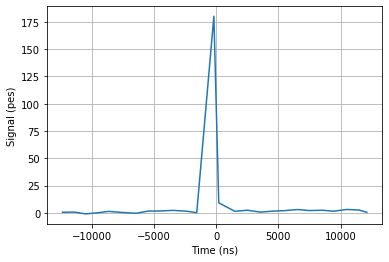

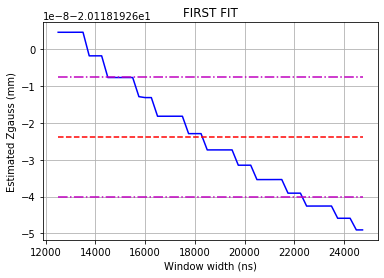

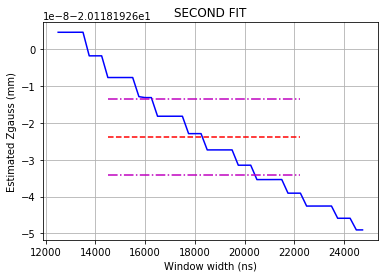

Nasty events:  []


In [15]:
# Get the Zgauss values by finding the flat line in the Zgauss vs window
all_Zgauss = []
nasty_events = []

maxshow = 20
shown = 0
for ievt in range(len(events_window_Zgauss)):    
    
    nasty = False
    
    try:

        # First iteration of fit
        long_window_cut = events_window_cut > events_window_cut[-1] / 2
        xdata = events_window_cut[long_window_cut]
        ydata = events_window_Zgauss[ievt][long_window_cut]
        popt, pcov = curve_fit(const, xdata, ydata, p0 = np.mean(ydata))

        fitdata = const(xdata, *popt)
        stdev = np.std(ydata)
        errors = (fitdata - stdev, fitdata + stdev)

        stdev_mask = (ydata > errors[0]) & (ydata < errors[1])

        # Second iteration of fit, without outliers

        xdata2 = xdata[stdev_mask]
        ydata2 = ydata[stdev_mask]
        popt, pcov = curve_fit(const, xdata2, ydata2, p0 = np.mean(ydata))

        fitdata2 = const(xdata2, *popt)
        stdev2 = np.std(ydata2)
        errors2 = (fitdata2 - stdev2, fitdata2 + stdev2)

        Zgauss = popt[0]
        all_Zgauss.append(Zgauss)
        
        if shown < maxshow and Emask[ievt] and Zgauss < 0:
            shown += 1

            print('Zgauss =', Zgauss)
            print('Energy =', events_energy[ievt])
            
            # Plot the waveform
            plt.xlabel('Time (ns)')
            plt.ylabel('Signal (pes)')
            plt.plot(events_times[ievt] - np.mean(events_times[ievt]), events_sumwf[ievt])
            plt.grid(True)
            plt.show()

            
            # Plot the first fit curve
            plt.plot(xdata, ydata, color='b')
            plt.plot(xdata, fitdata, '--', color='r')
            plt.plot(xdata, errors[0], '-.', color='m')
            plt.plot(xdata, errors[1], '-.', color='m')
            plt.xlabel('Window width (ns)')
            plt.ylabel('Estimated Zgauss (mm)')
            plt.title('FIRST FIT')
            plt.grid(True)
            plt.show()

            # Plot the second fit curve
            plt.plot(xdata, ydata, color='b')
            plt.plot(xdata2, fitdata2, '--', color='r')
            plt.plot(xdata2, errors2[0], '-.', color='m')
            plt.plot(xdata2, errors2[1], '-.', color='m')
            plt.xlabel('Window width (ns)')
            plt.ylabel('Estimated Zgauss (mm)')
            plt.title('SECOND FIT')
            plt.grid(True)
            plt.show()

    except:
        
        Zgauss = 0
        all_Zgauss.append(Zgauss)
        nasty = True
        
        if Emask[ievt]:
            print('You might have an issue with event', ievt, ': it is big, but cannot fit a Z value.')
            nasty_events.append(ievt)
    
all_Zgauss = np.array(all_Zgauss)
print('Nasty events: ', nasty_events)

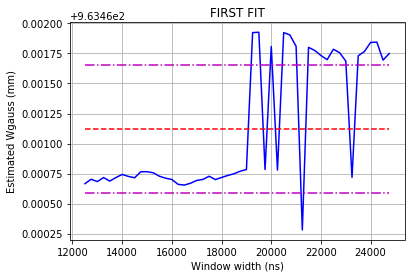

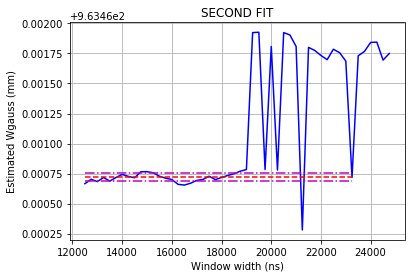

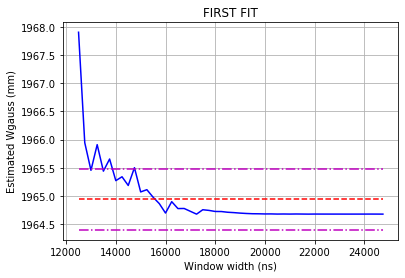

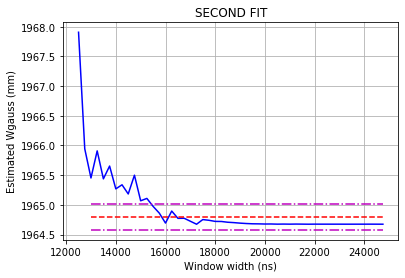

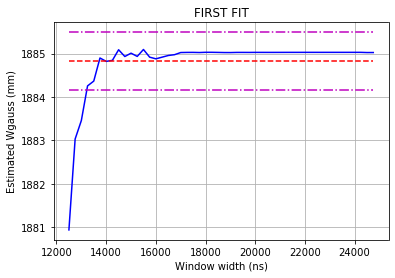

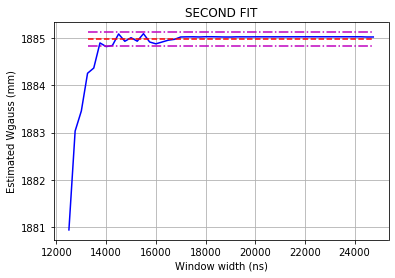

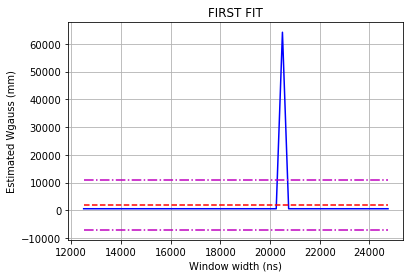

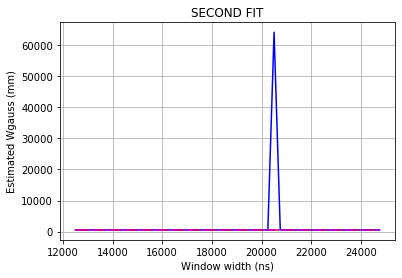

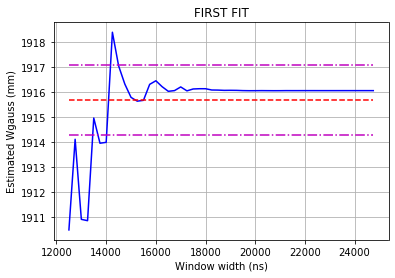

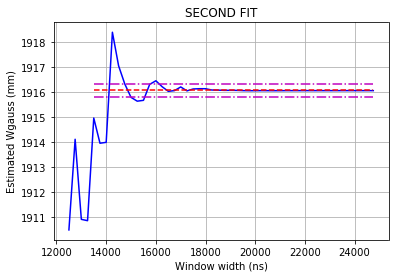

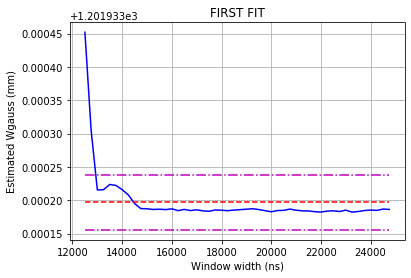

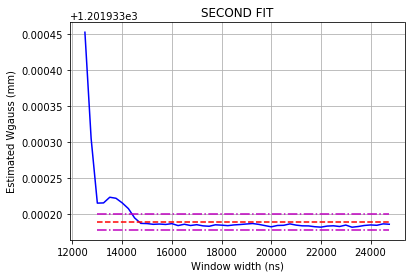

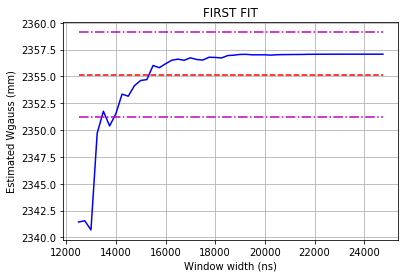

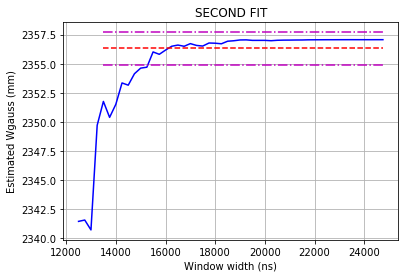

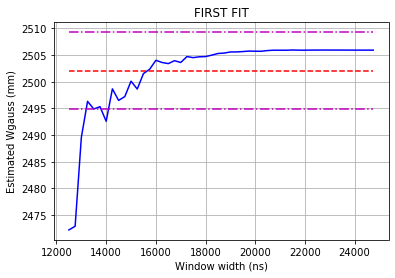

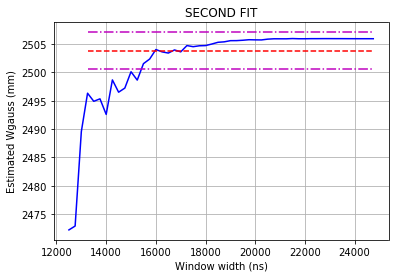

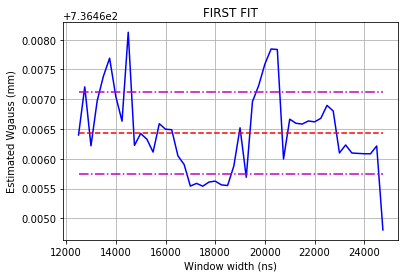

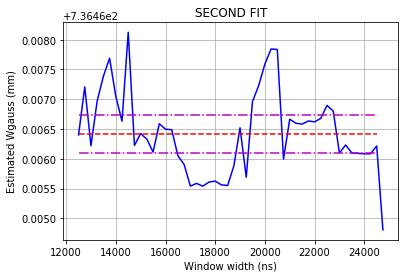

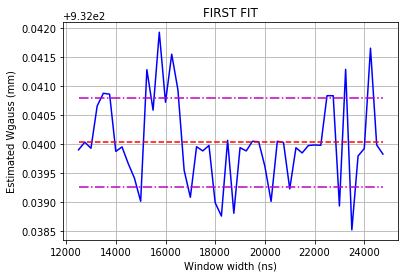

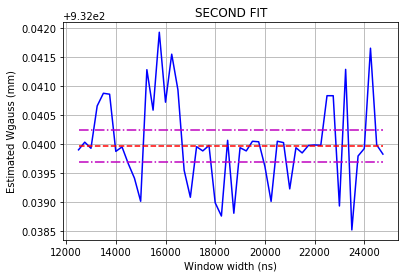

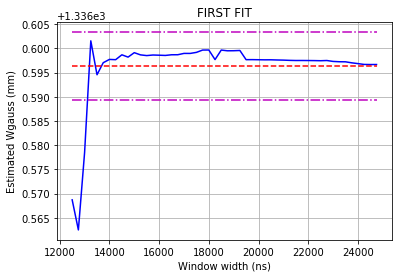

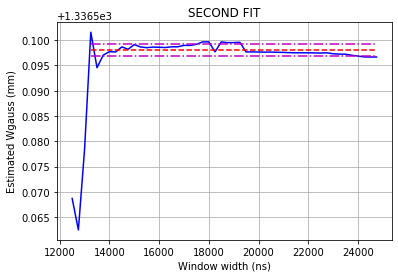

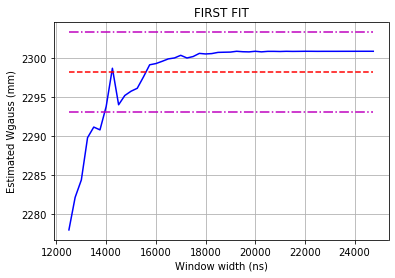

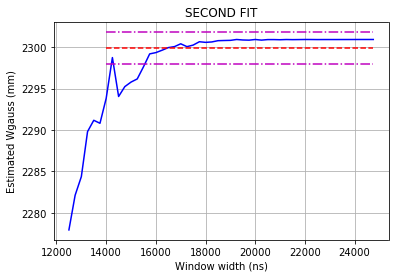

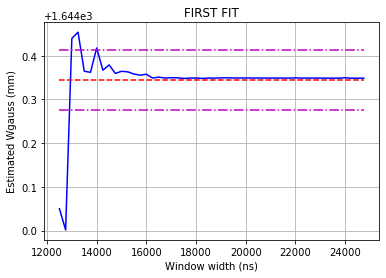

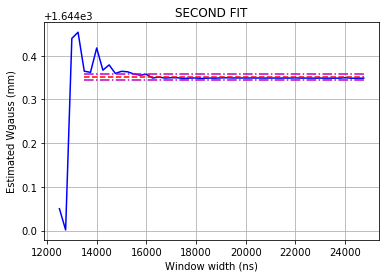

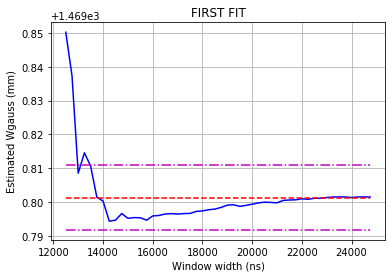

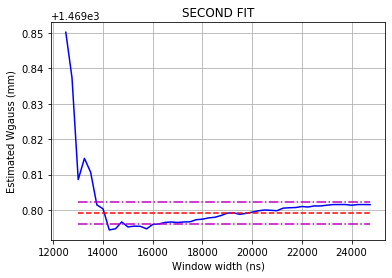

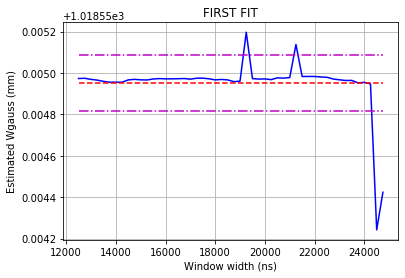

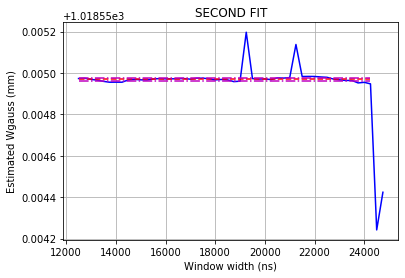

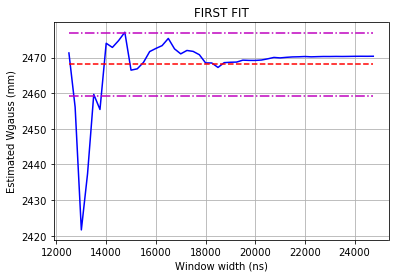

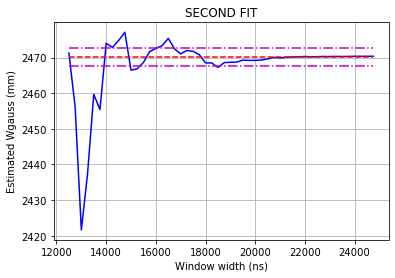

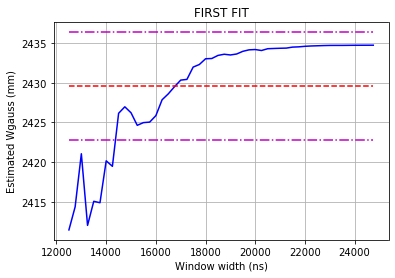

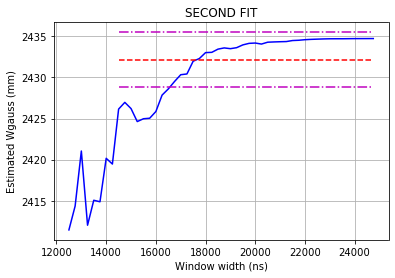

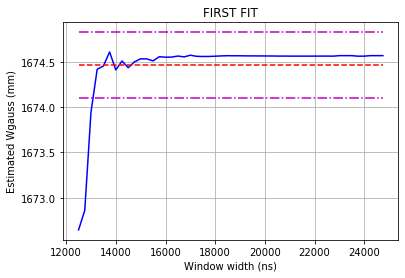

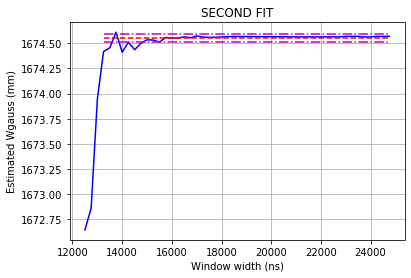

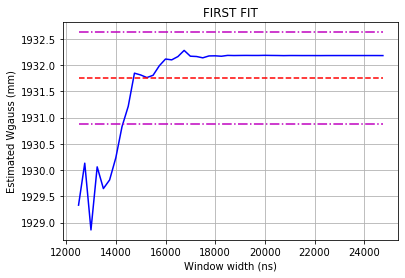

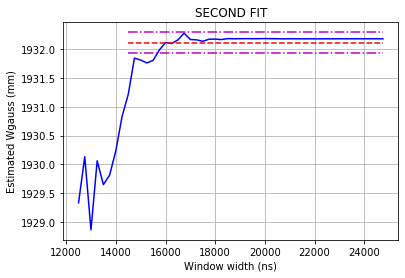

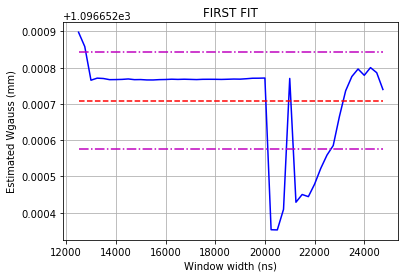

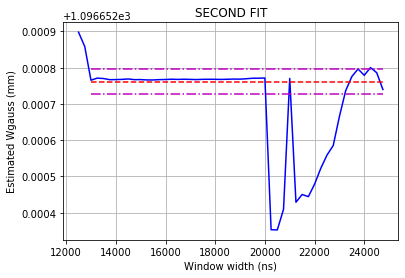

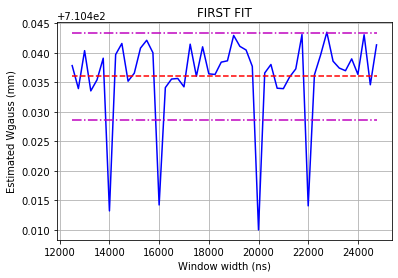

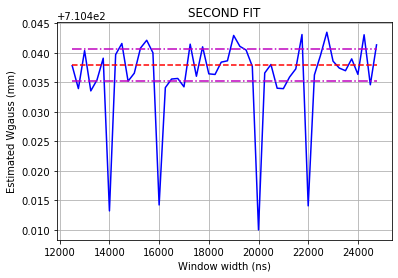

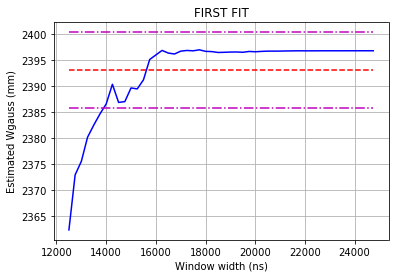

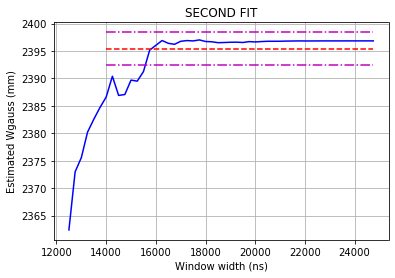

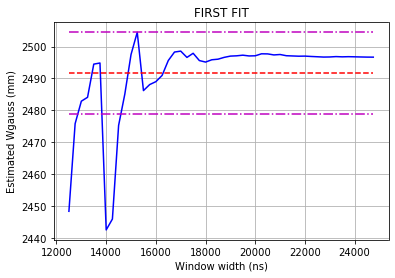

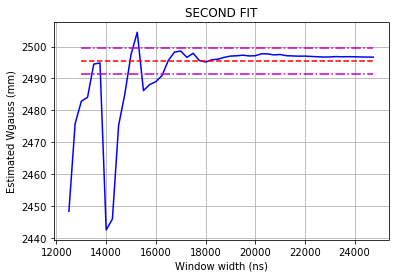

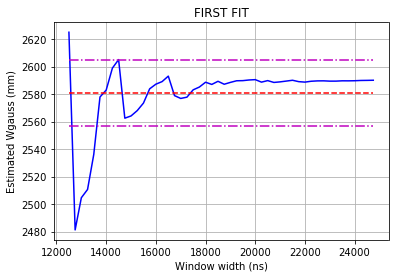

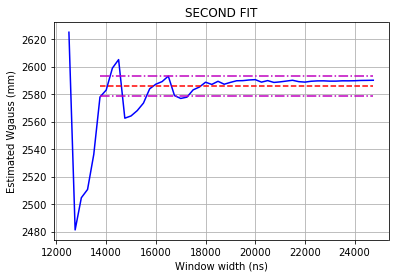

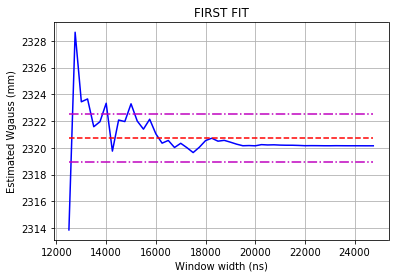

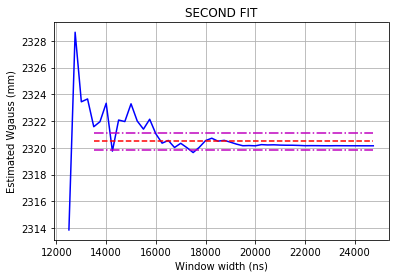

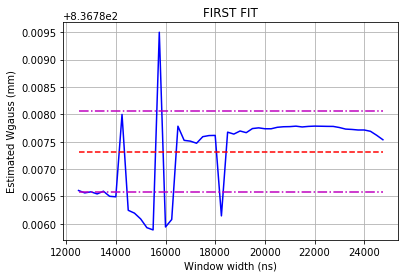

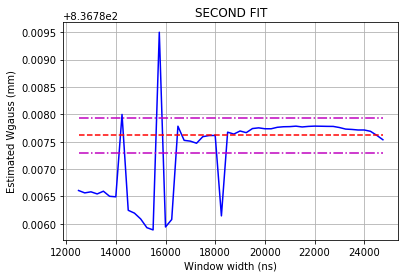

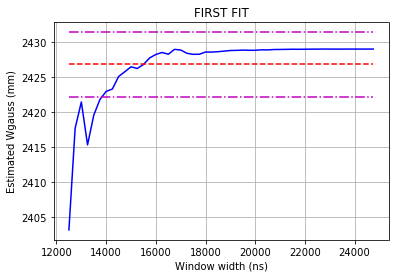

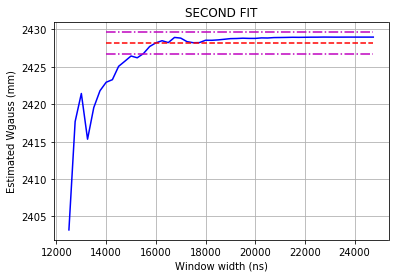

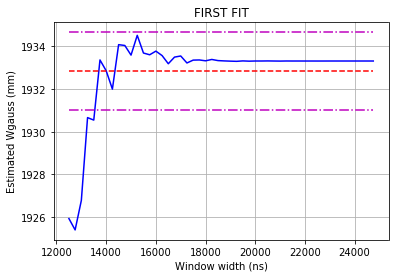

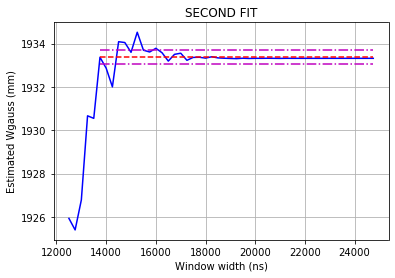

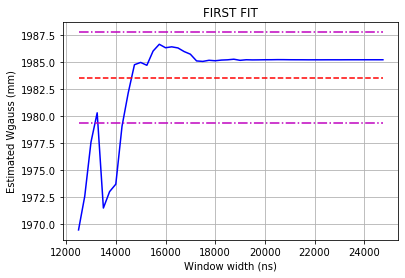

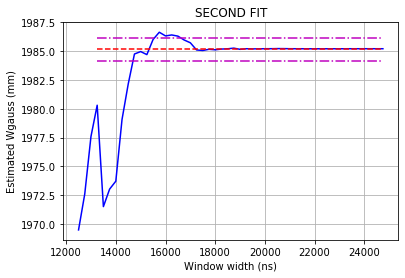

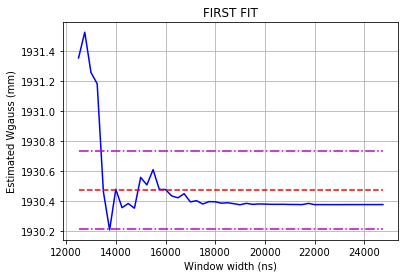

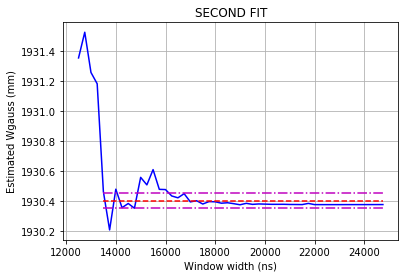

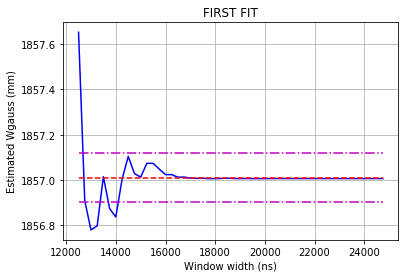

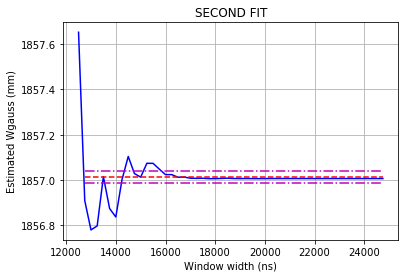

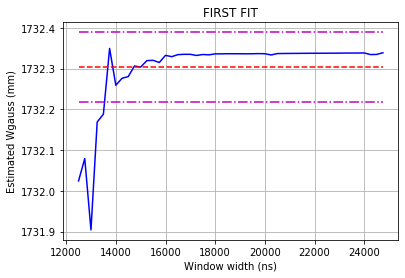

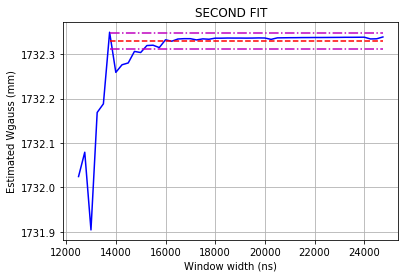

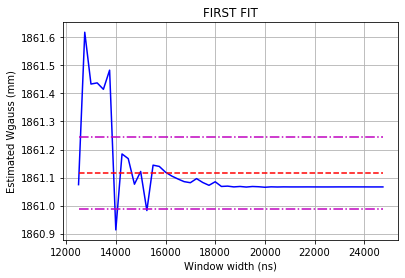

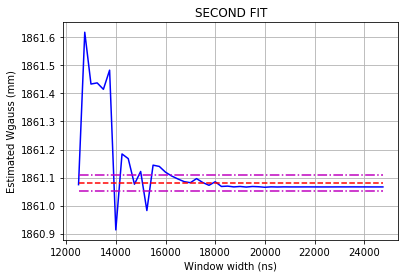

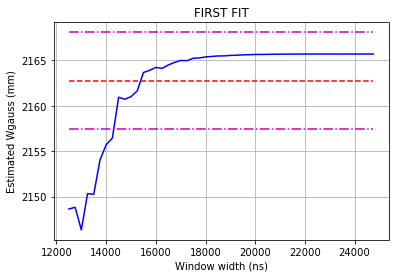

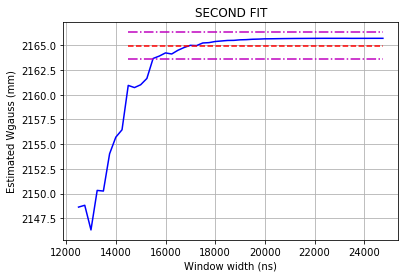

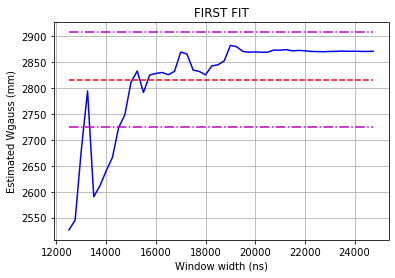

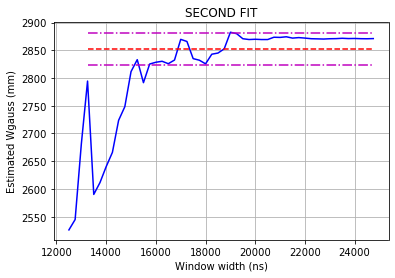

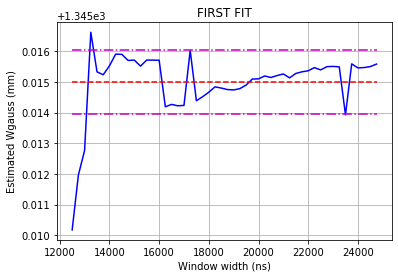

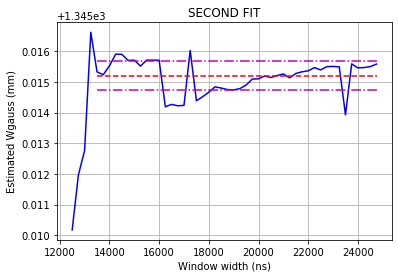

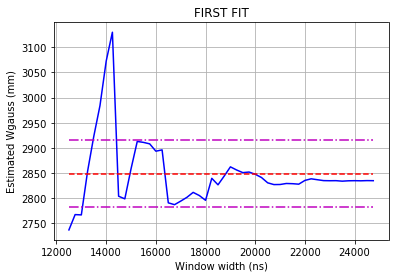

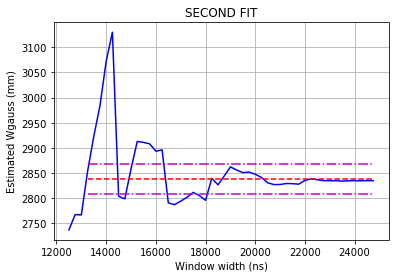

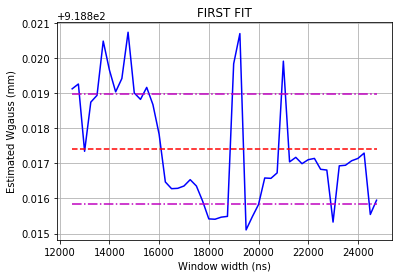

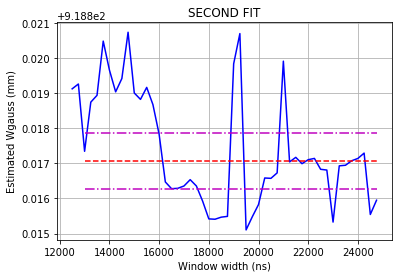

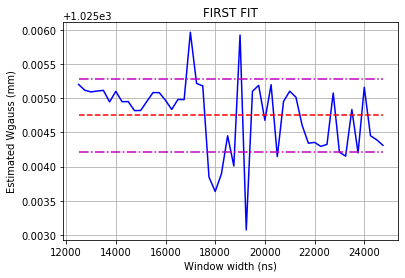

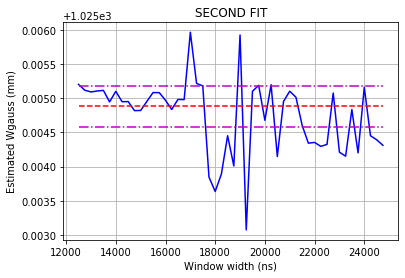

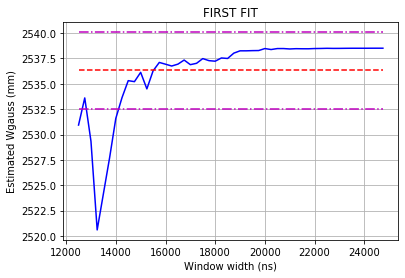

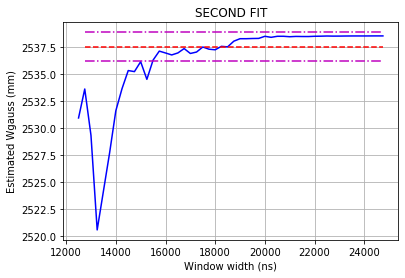

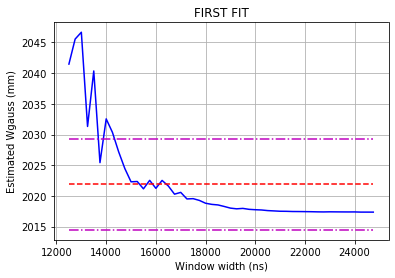

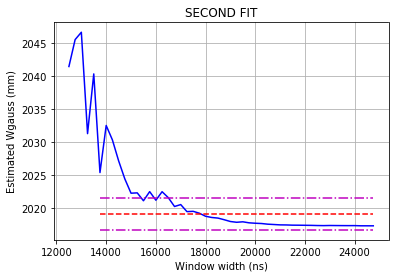

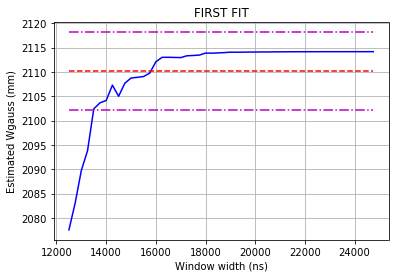

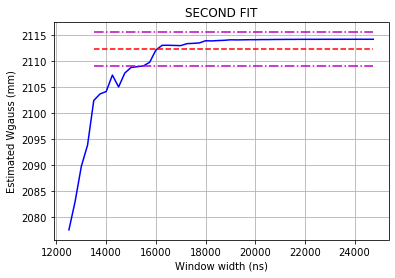

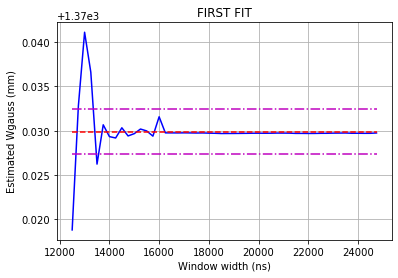

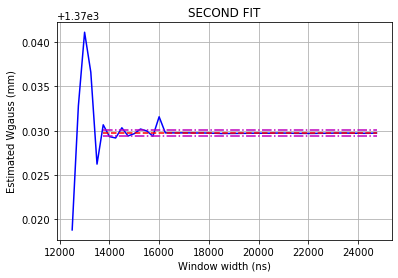

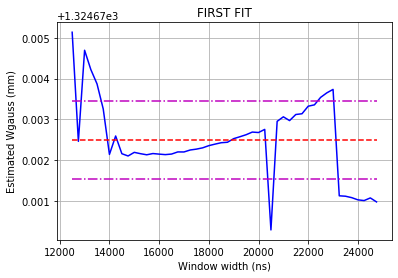

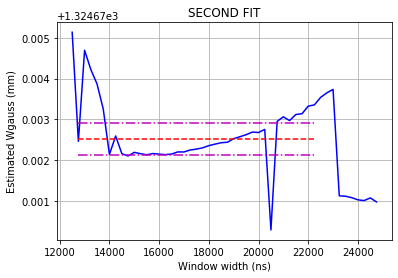

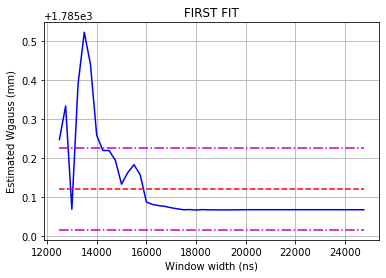

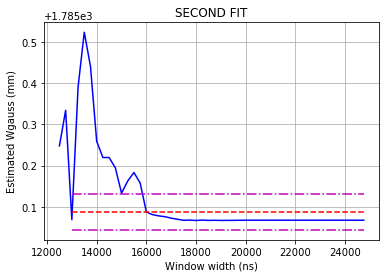

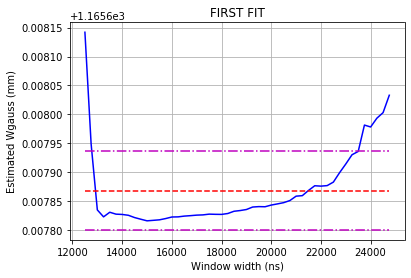

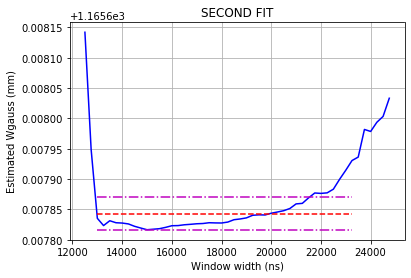

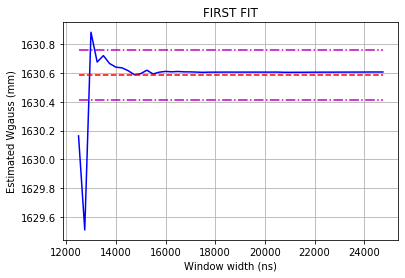

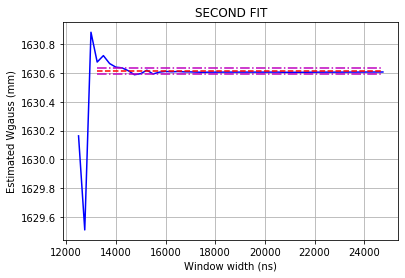

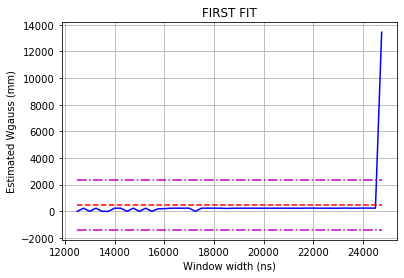

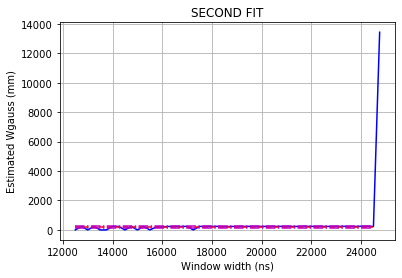

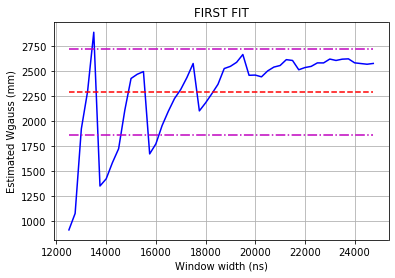

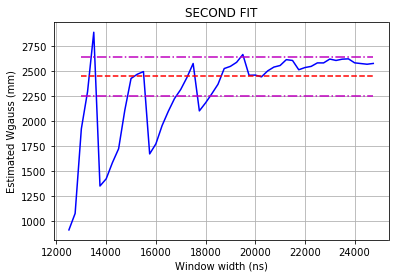

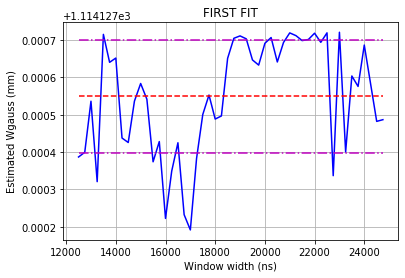

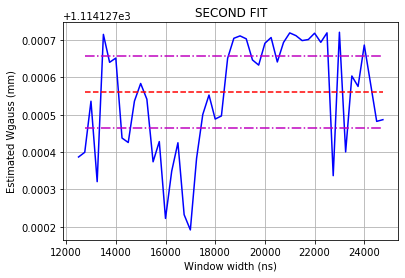

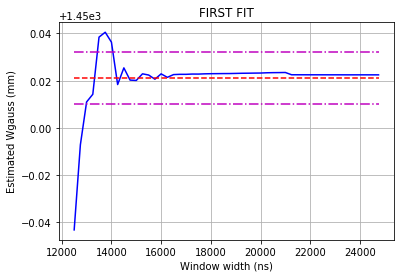

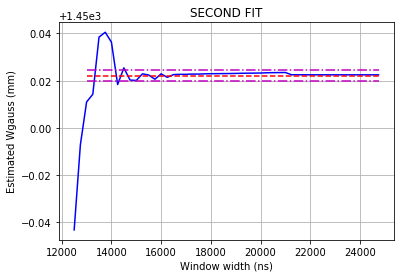

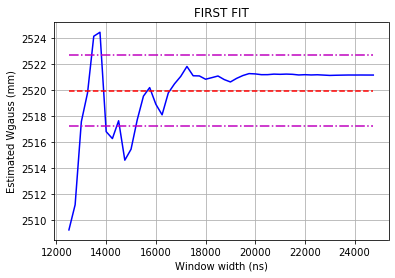

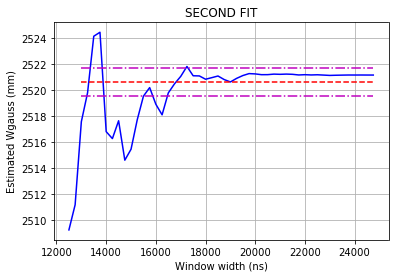

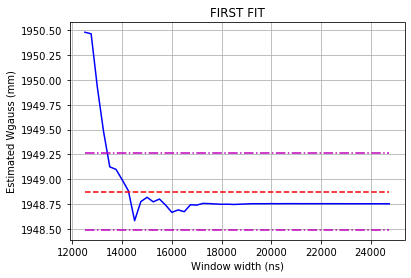

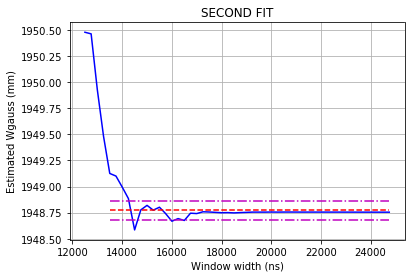

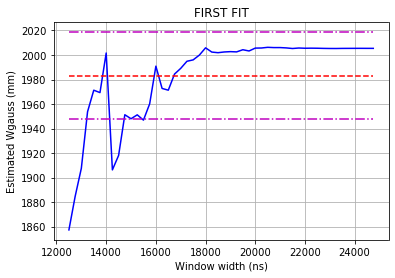

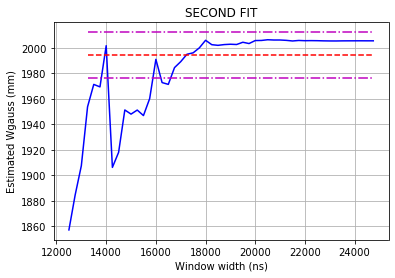

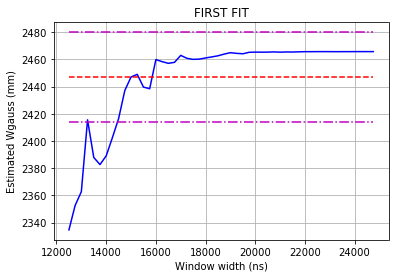

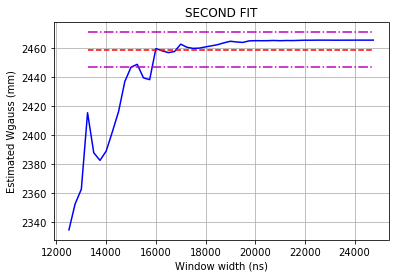

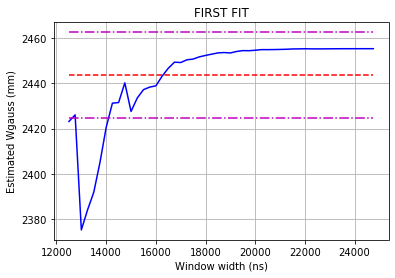

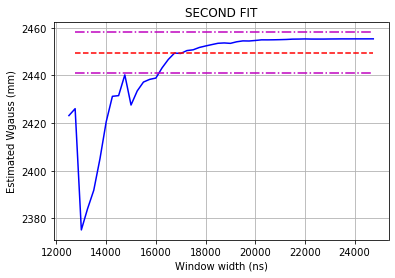

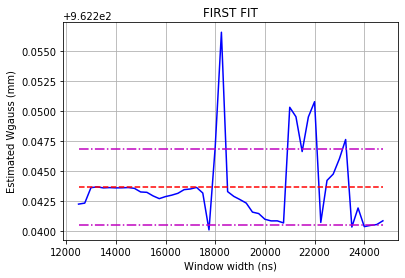

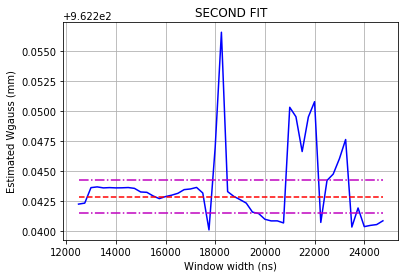

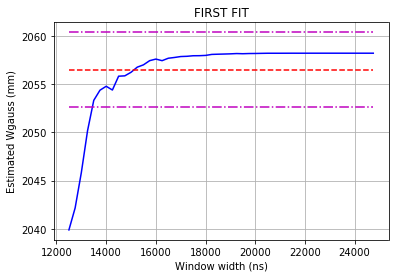

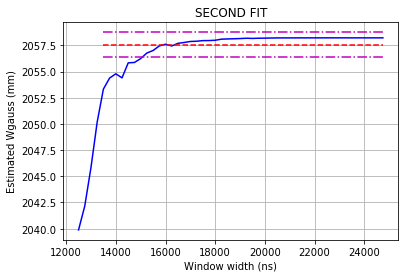

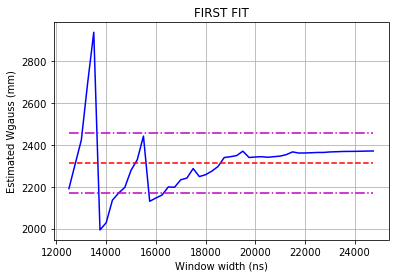

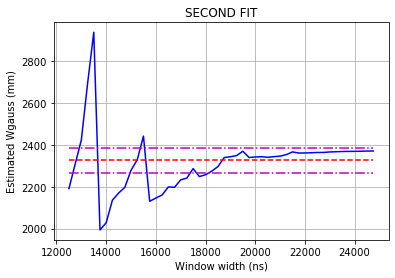

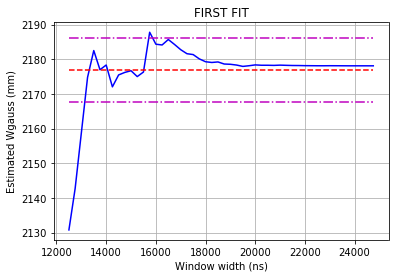

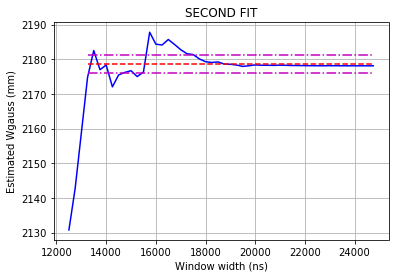

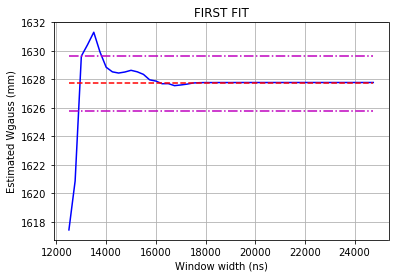

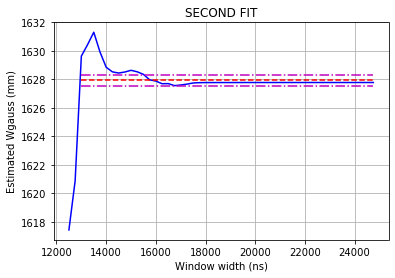

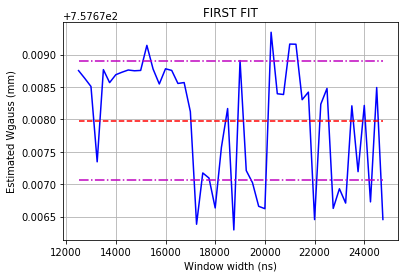

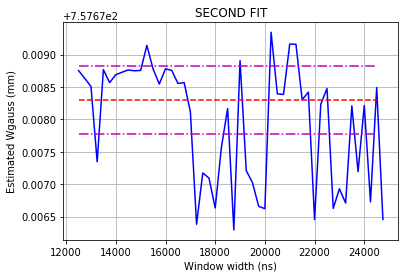

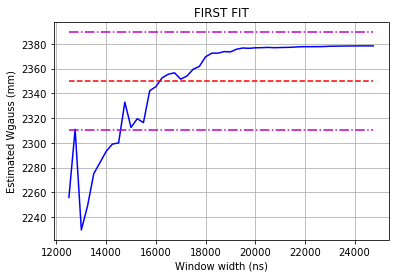

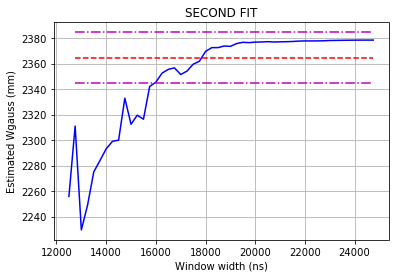

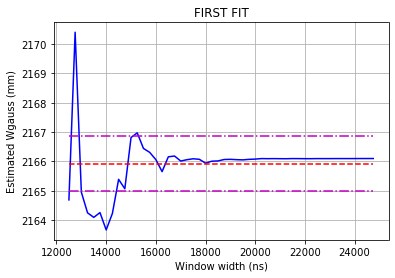

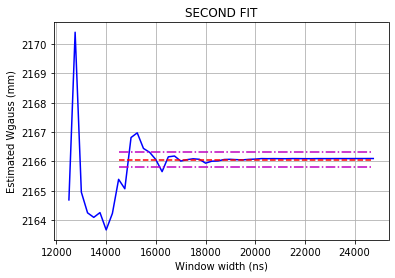

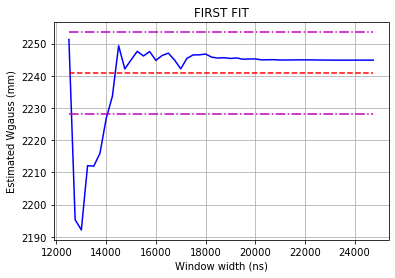

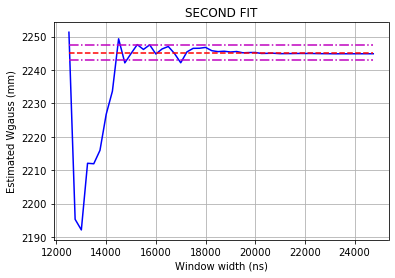

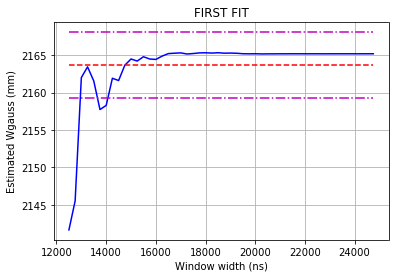

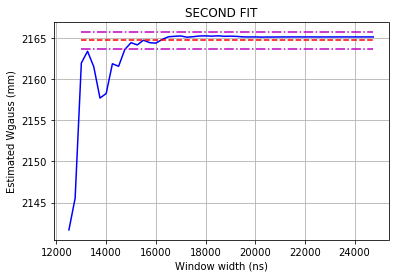

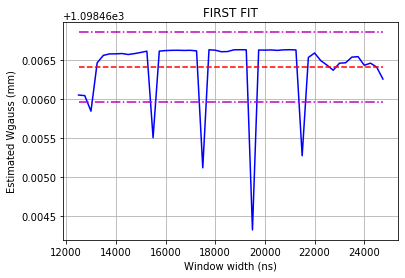

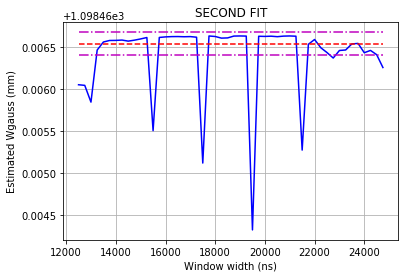

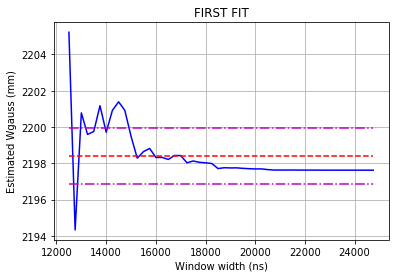

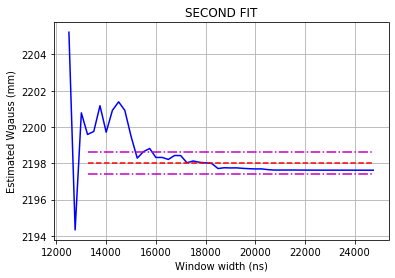

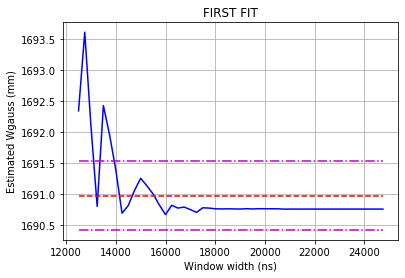

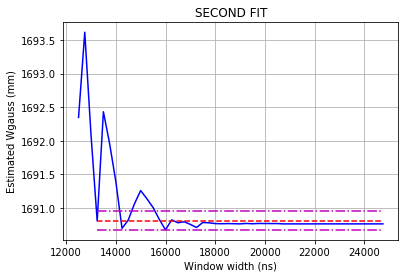

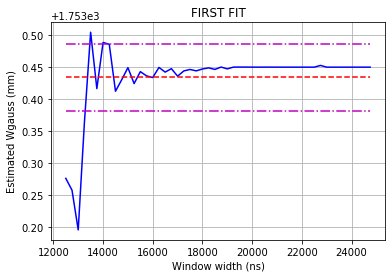

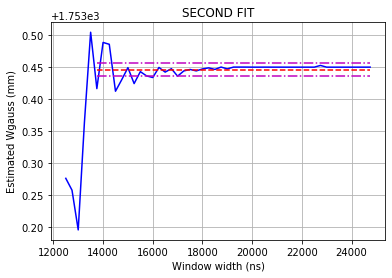

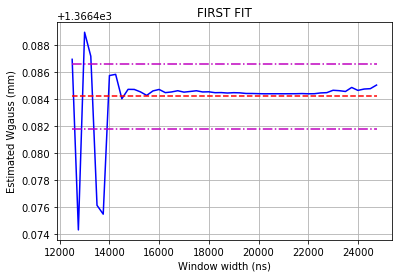

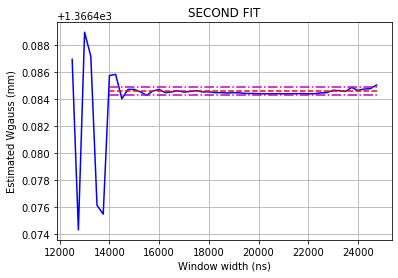

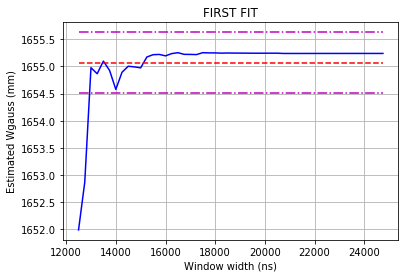

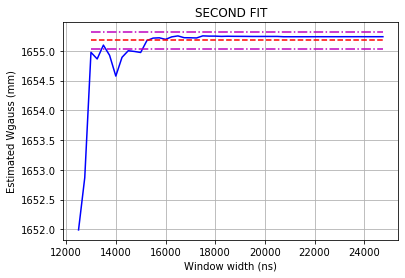

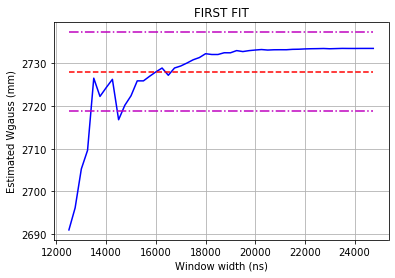

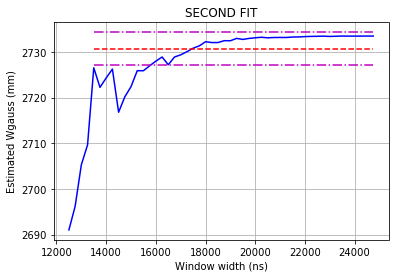

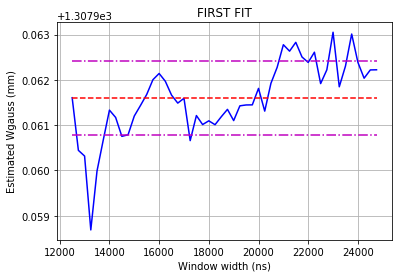

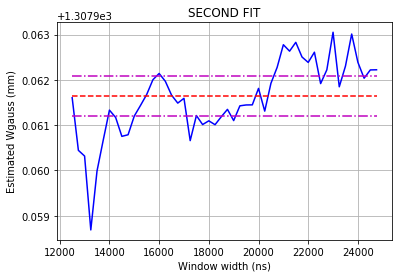

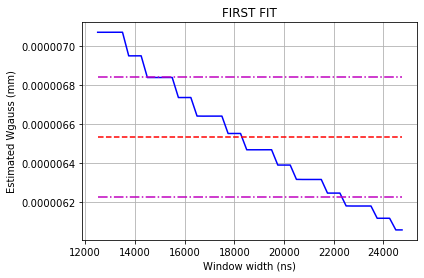

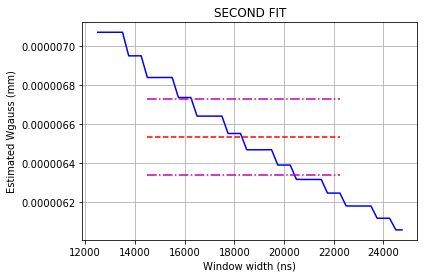

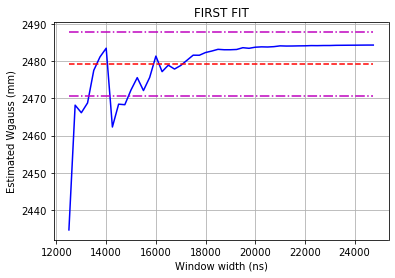

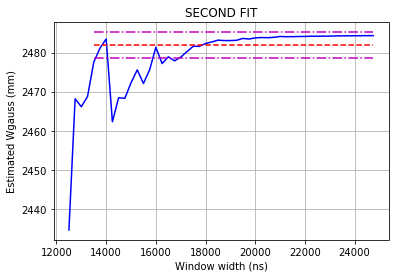

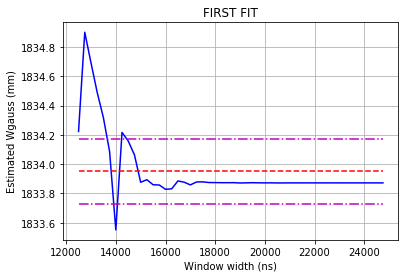

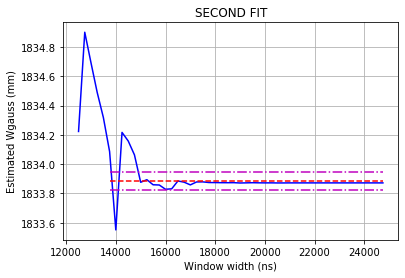

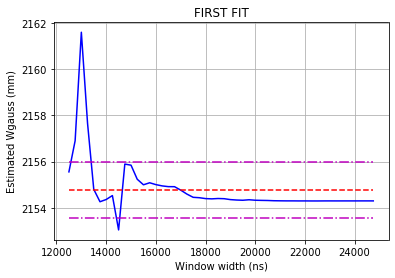

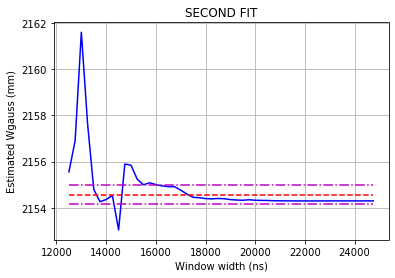

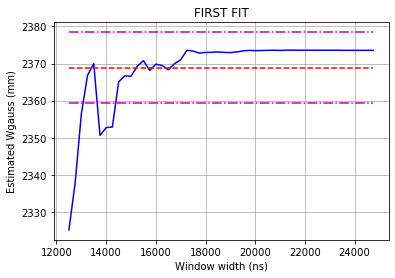

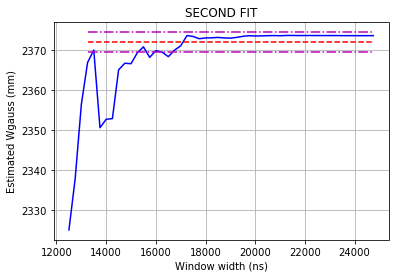

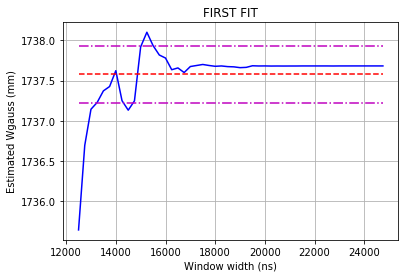

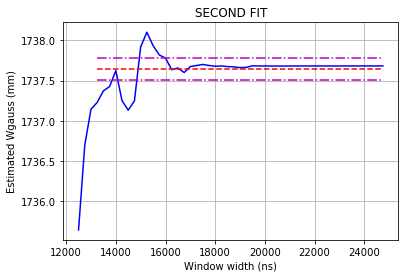

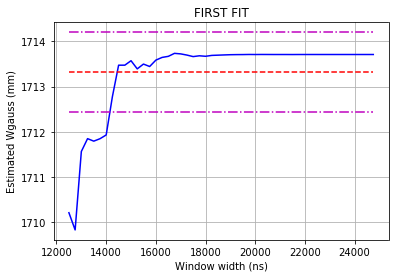

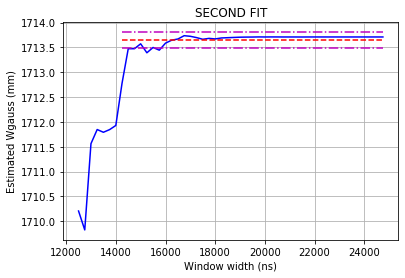

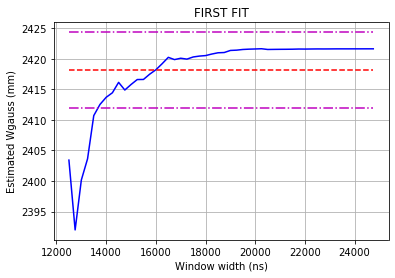

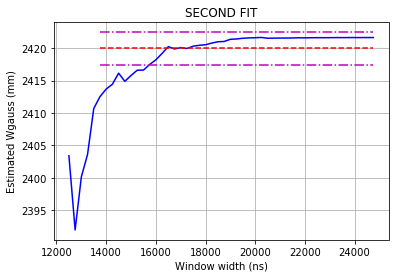

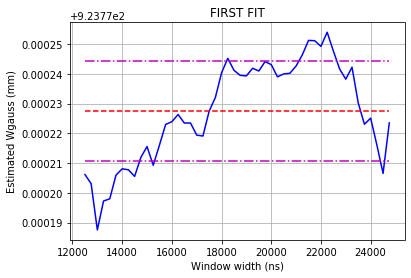

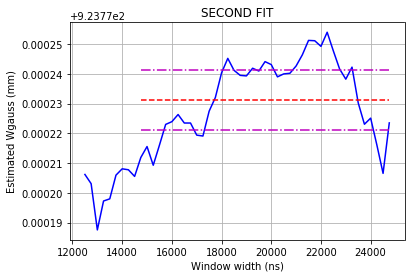

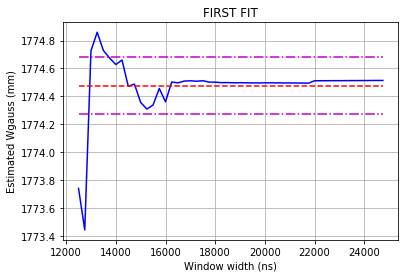

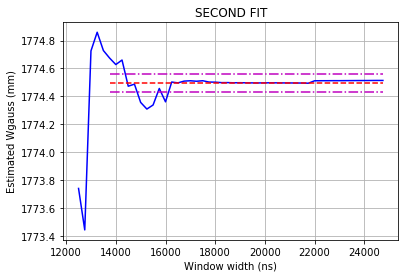

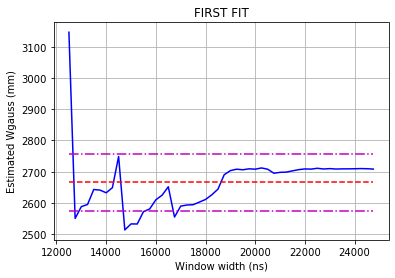

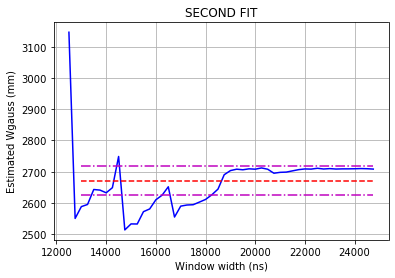

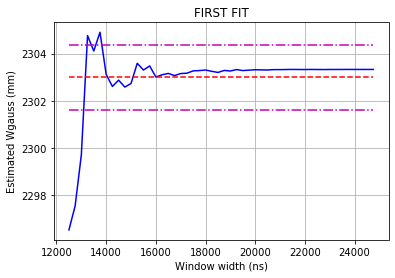

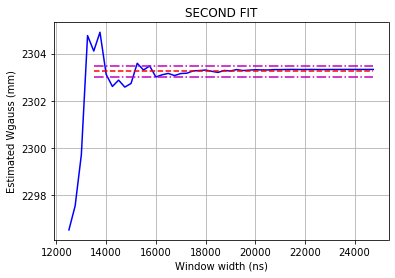

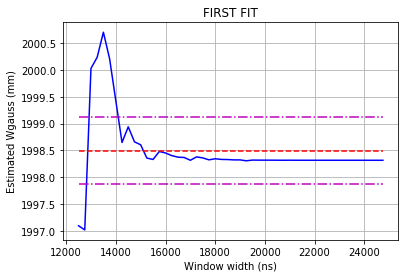

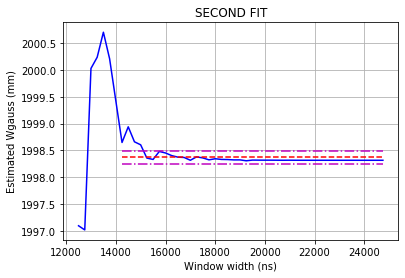

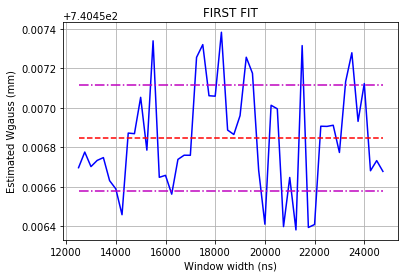

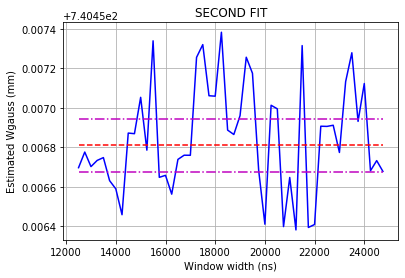

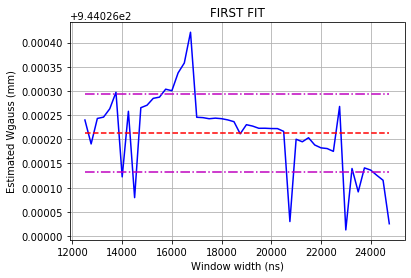

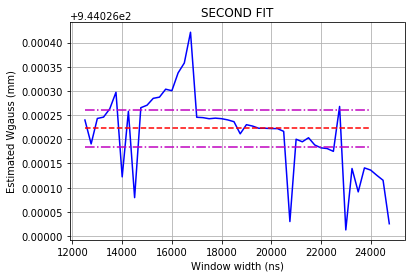

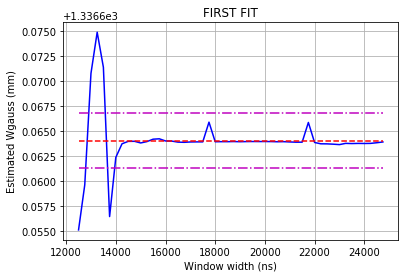

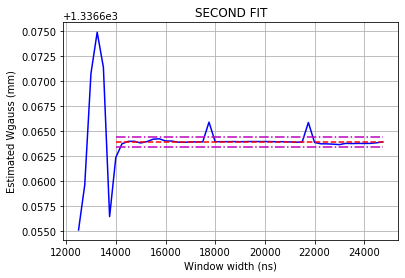

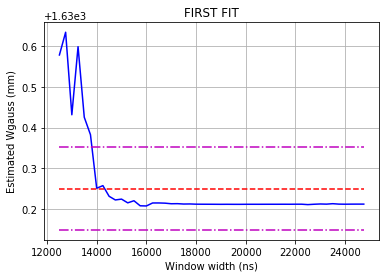

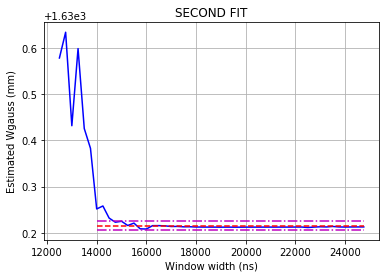

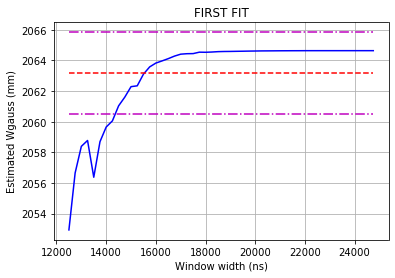

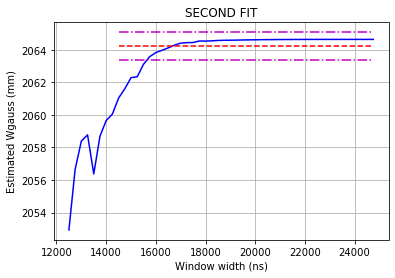

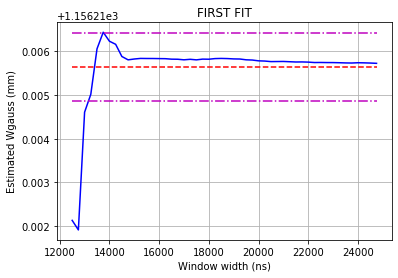

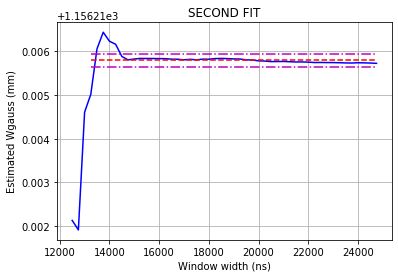

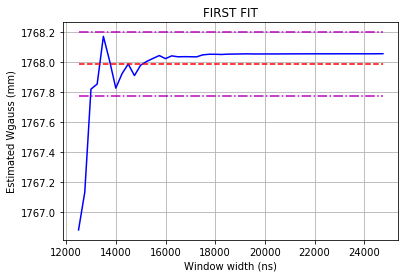

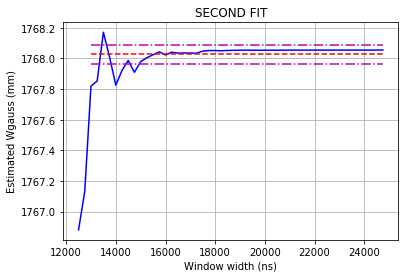

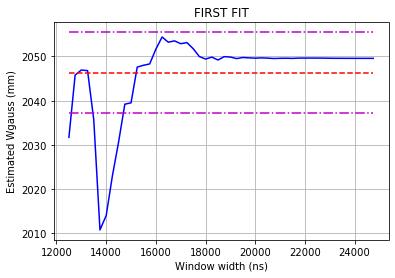

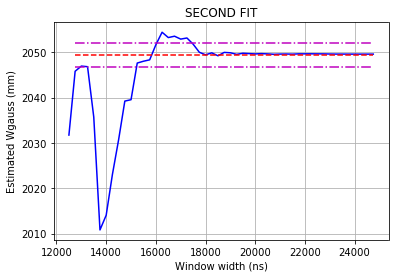

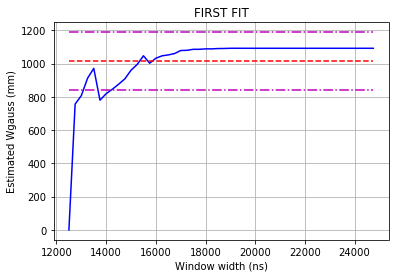

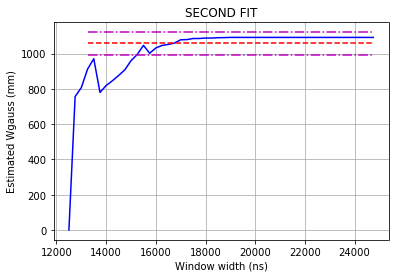

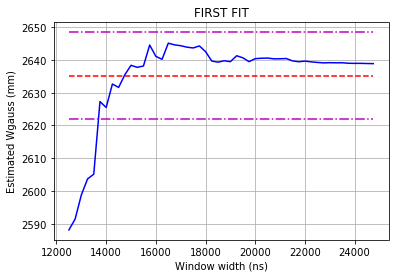

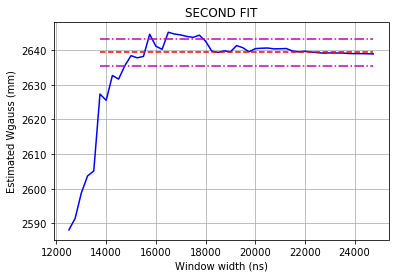

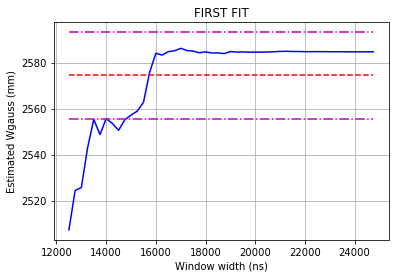

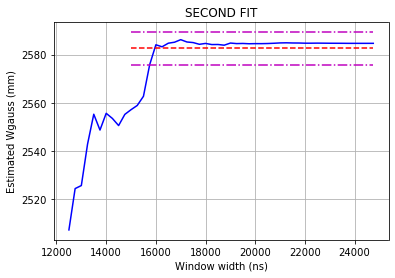

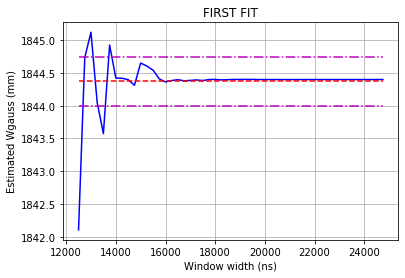

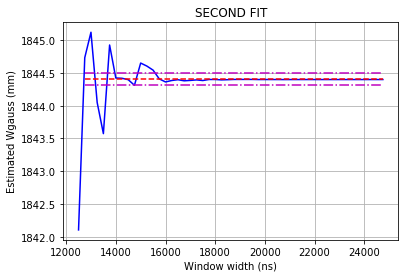

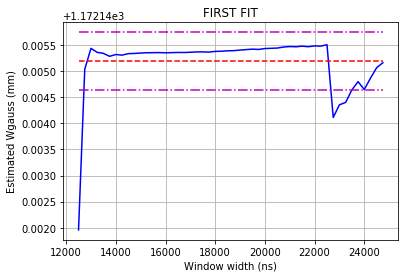

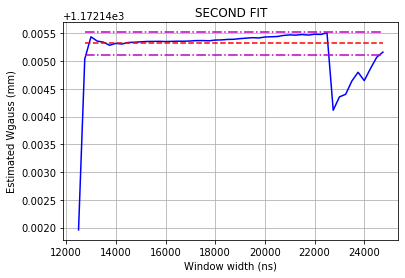

Nasty events:  []


In [16]:
# Get the Wgauss values by finding the flat line in the Wgauss vs window
all_Wgauss = []
nasty_events_W = []

maxshow = 100
shown = 0
for ievt in range(len(events_window_Wgauss)):    
    
    nasty = False
    
    try:

        # First iteration of fit
        long_window_cut = events_window_cut > events_window_cut[-1] / 2
        xdata = events_window_cut[long_window_cut]
        ydata = events_window_Wgauss[ievt][long_window_cut]
        popt, pcov = curve_fit(const, xdata, ydata, p0 = np.mean(ydata))

        fitdata = const(xdata, *popt)
        stdev = np.std(ydata)
        errors = (fitdata - stdev, fitdata + stdev)

        stdev_mask = (ydata > errors[0]) & (ydata < errors[1])

        # Second iteration of fit, without outliers

        xdata2 = xdata[stdev_mask]
        ydata2 = ydata[stdev_mask]
        popt, pcov = curve_fit(const, xdata2, ydata2, p0 = np.mean(ydata))

        fitdata2 = const(xdata2, *popt)
        stdev2 = np.std(ydata2)
        errors2 = (fitdata2 - stdev2, fitdata2 + stdev2)

        Wgauss = popt[0]
        all_Wgauss.append(Wgauss)
        
        if (shown < maxshow and Emask[ievt]):
                        
            shown += 1
            
            plt.plot(xdata, ydata, color='b')
            plt.plot(xdata, fitdata, '--', color='r')
            plt.plot(xdata, errors[0], '-.', color='m')
            plt.plot(xdata, errors[1], '-.', color='m')
            plt.xlabel('Window width (ns)')
            plt.ylabel('Estimated Wgauss (mm)')
            plt.title('FIRST FIT')
            plt.grid(True)
            plt.show()

            plt.plot(xdata, ydata, color='b')
            plt.plot(xdata2, fitdata2, '--', color='r')
            plt.plot(xdata2, errors2[0], '-.', color='m')
            plt.plot(xdata2, errors2[1], '-.', color='m')
            plt.xlabel('Window width (ns)')
            plt.ylabel('Estimated Wgauss (mm)')
            plt.title('SECOND FIT')
            plt.grid(True)
            plt.show()    
        
    except:
        
        Wgauss = 0
        all_Wgauss.append(Wgauss)
        nasty = True
        
        if Emask[ievt]:
            print('You might have an issue with event', ievt, ': it is big, but cannot fit a Z value.')
            nasty_events_W.append(ievt)
    
all_Wgauss = np.array(all_Wgauss)
print('Nasty events: ', nasty_events_W)

##############
EVENT NUMBER 24
##############


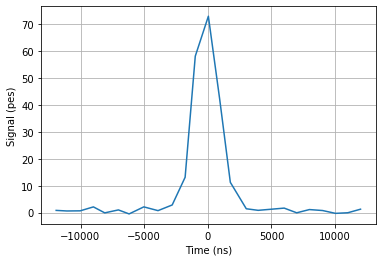

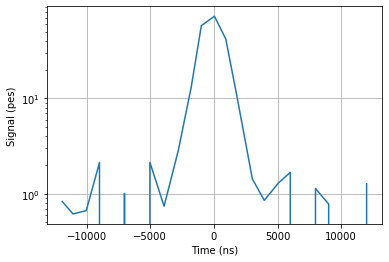

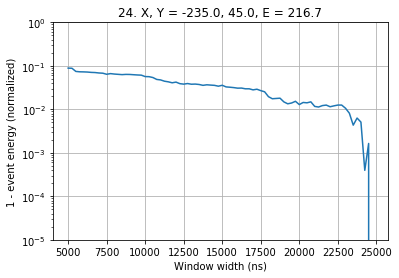

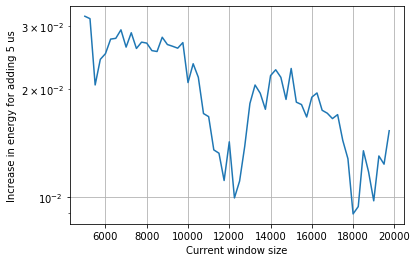

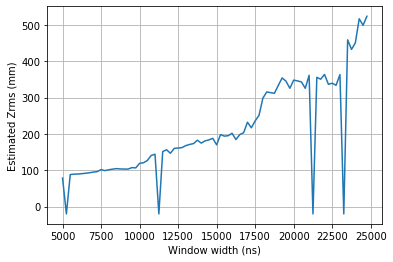

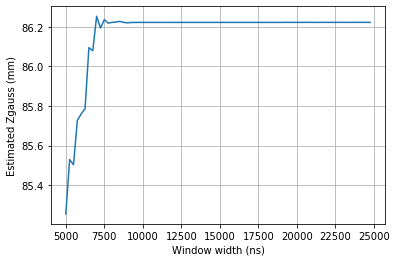

##############
EVENT NUMBER 30
##############


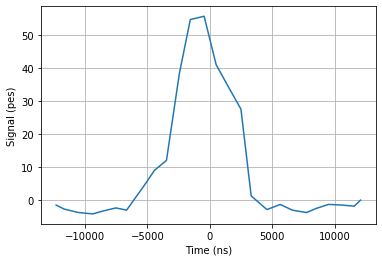

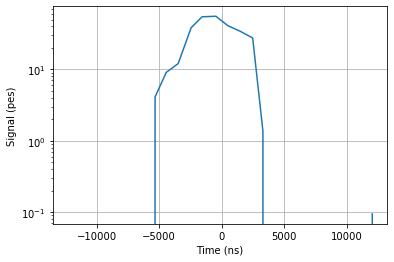

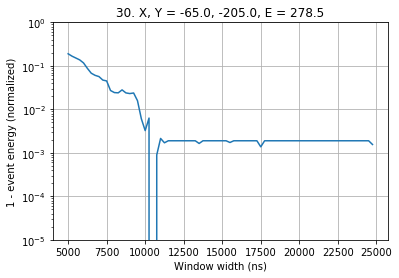

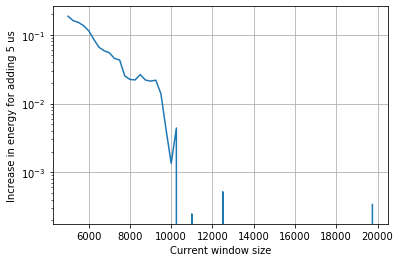

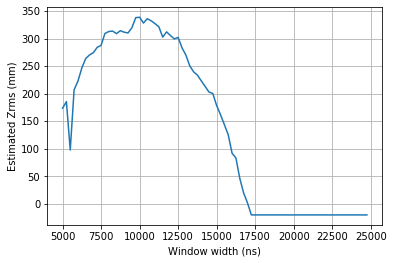

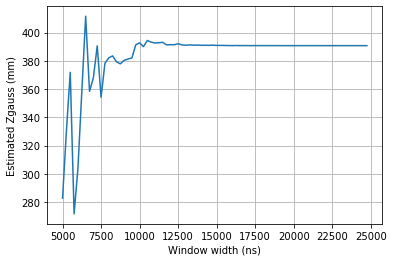

##############
EVENT NUMBER 35
##############


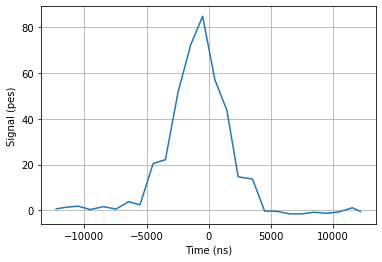

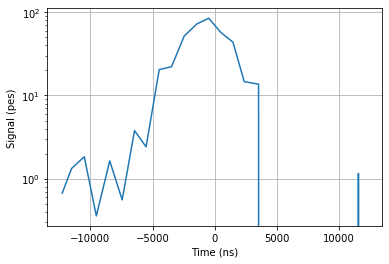

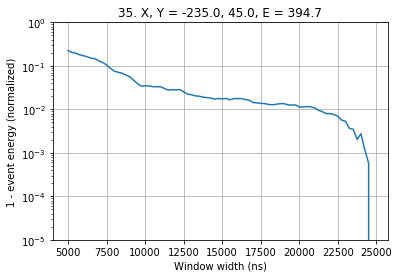

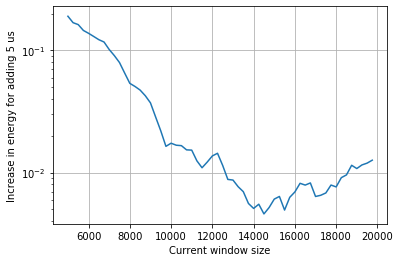

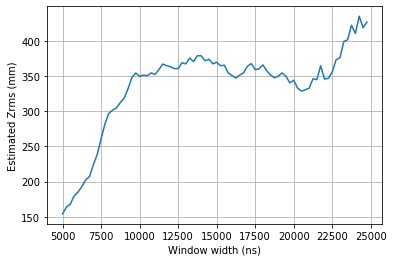

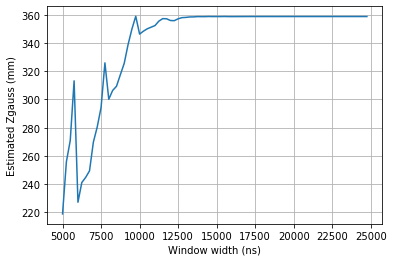

##############
EVENT NUMBER 37
##############


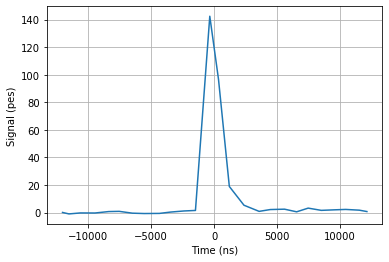

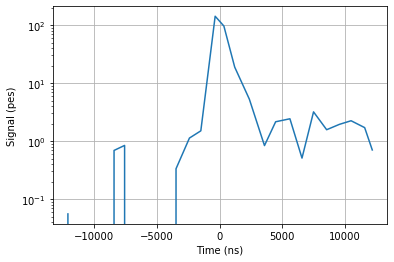

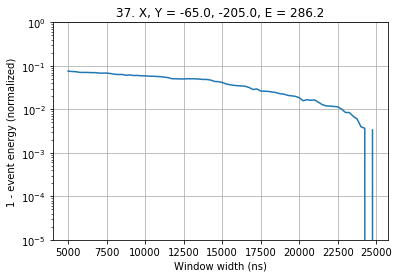

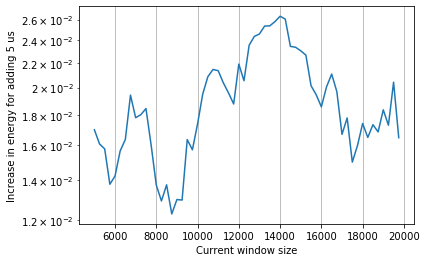

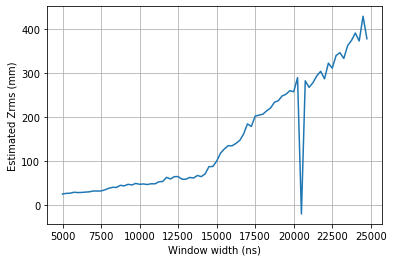

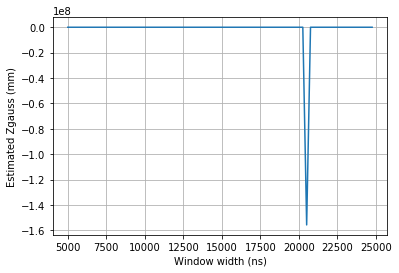

##############
EVENT NUMBER 54
##############


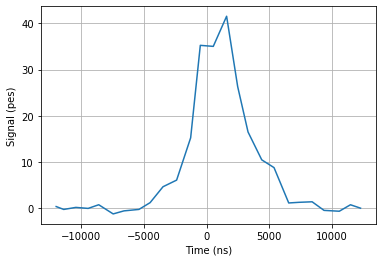

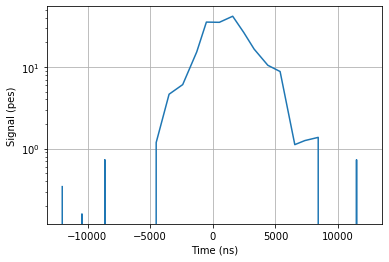

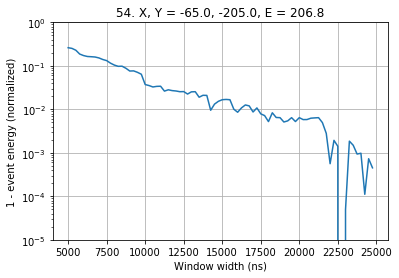

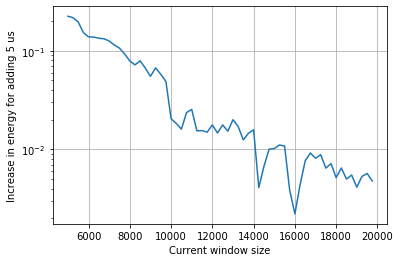

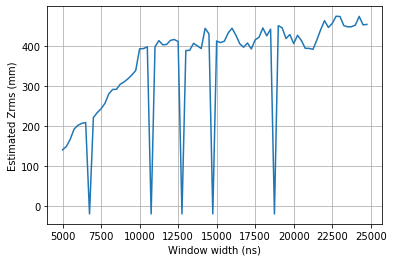

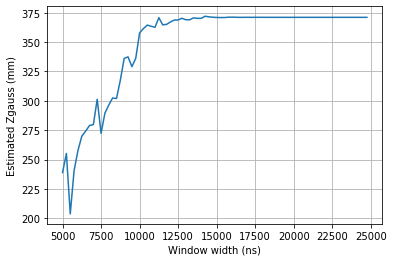

##############
EVENT NUMBER 63
##############


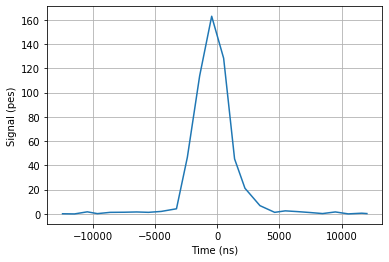

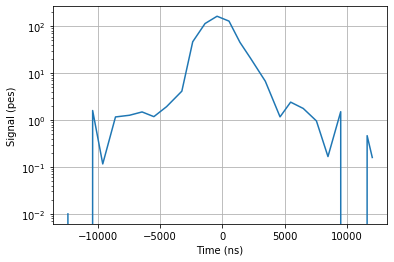

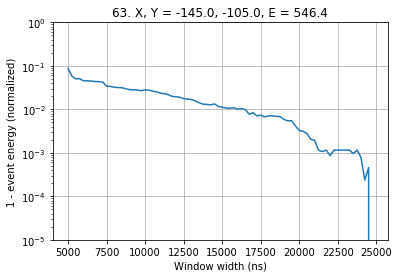

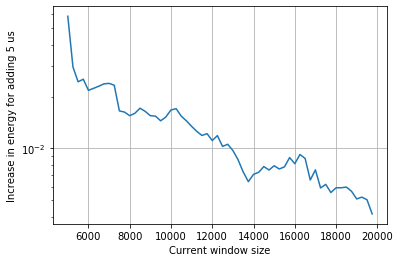

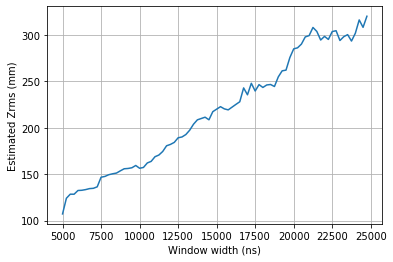

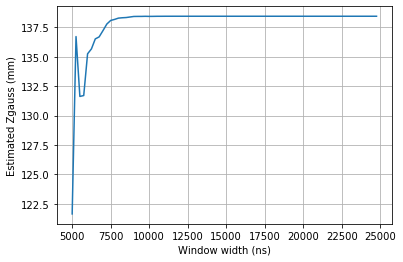

##############
EVENT NUMBER 67
##############


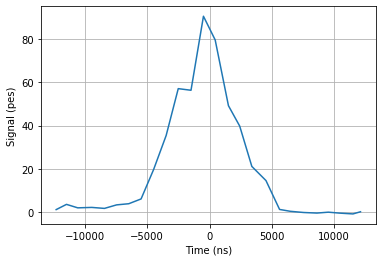

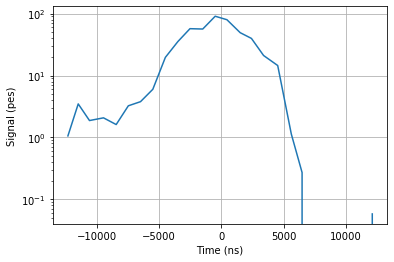

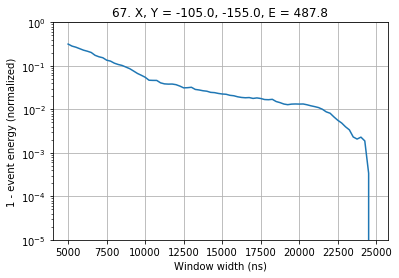

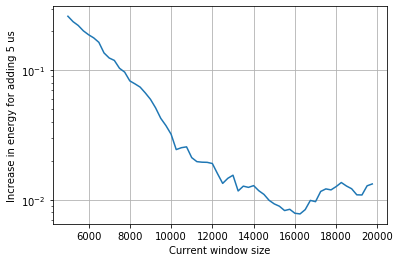

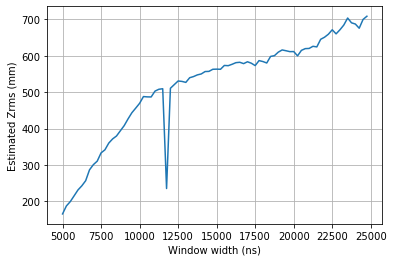

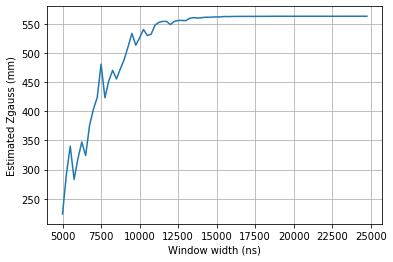

##############
EVENT NUMBER 68
##############


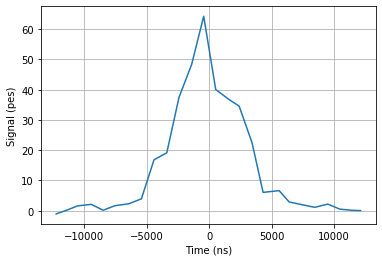

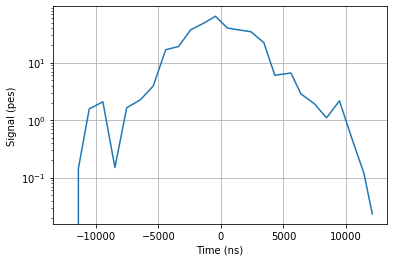

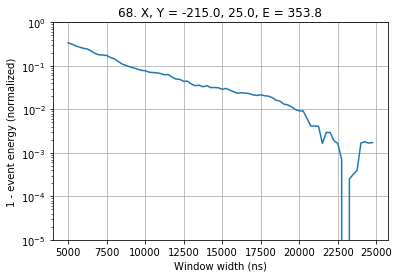

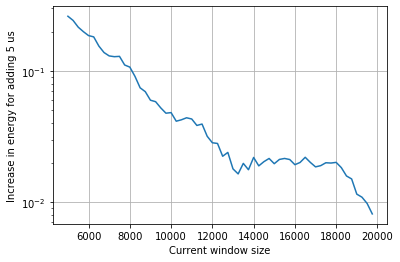

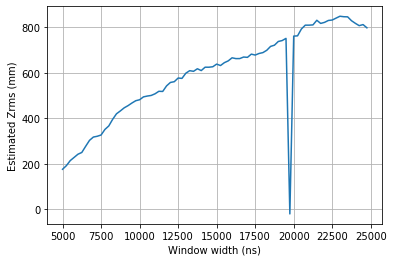

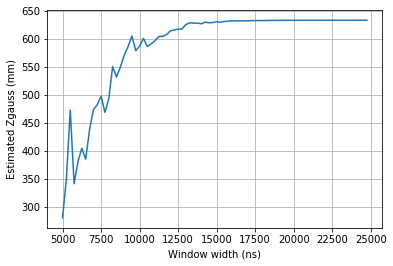

##############
EVENT NUMBER 74
##############


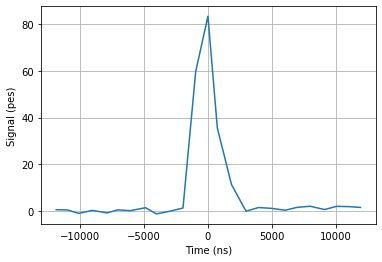

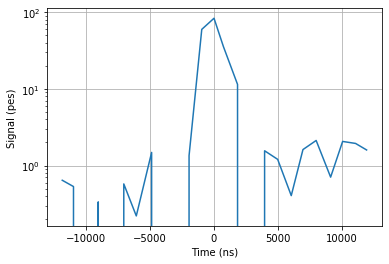

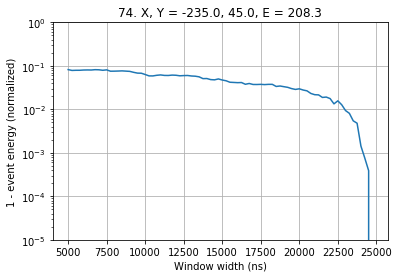

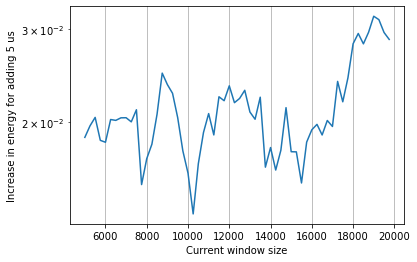

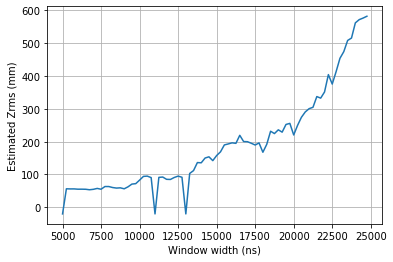

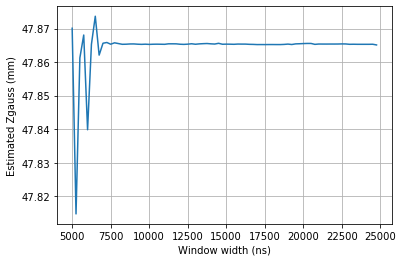

##############
EVENT NUMBER 78
##############


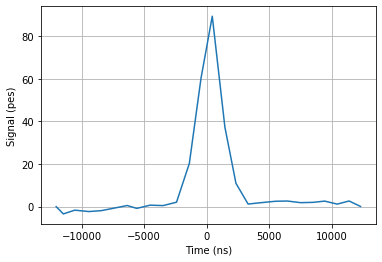

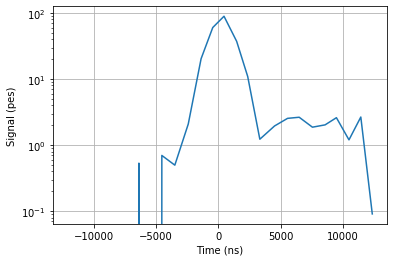

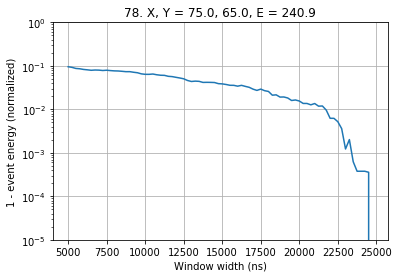

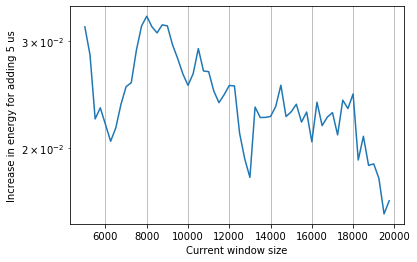

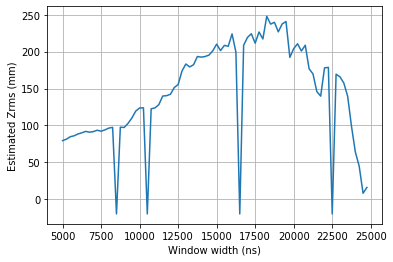

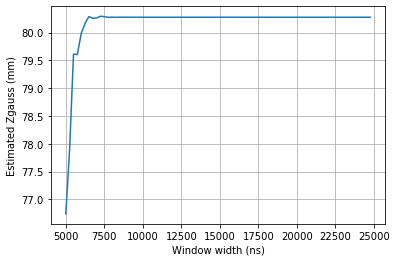

In [18]:
all_energy_cutoffs_999 = np.array([2 * (window_min + dwindow * np.argmax(window_energy_norm > 0.999)) * ns_per_sample for window_energy_norm in events_window_energy_norm])
all_energy_cutoffs_99 = np.array([2 * (window_min + dwindow * np.argmax(window_energy_norm > 0.99)) * ns_per_sample for window_energy_norm in events_window_energy_norm])
all_Zrms = np.array([ np.max(window_Zrms) for window_Zrms in events_window_Zrms ])
all_Wrms = np.array([ np.max(window_Wrms) for window_Wrms in events_window_Wrms ])
all_Xs = np.array( [window_maxX[-1] for window_maxX in events_window_maxX] )
all_Ys = np.array( [window_maxY[-1] for window_maxY in events_window_maxY] )

maxshow = 10
shown = 0
for i_evt in range(len(events_window_energy_norm)):
        
    if shown < maxshow and Emask[i_evt]:

        X = events_window_maxX[i_evt][-1]
        Y = events_window_maxY[i_evt][-1]
        E = round(max(events_window_energy[i_evt]), 1)
        
        shown += 1

        print('##############')
        print('EVENT NUMBER', i_evt)
        print('##############')

        # Plot the waveform
        plt.xlabel('Time (ns)')
        plt.ylabel('Signal (pes)')
        plt.plot(events_times[i_evt] - np.mean(events_times[i_evt]), events_sumwf[i_evt])
        plt.grid(True)
        plt.show()

        # Plot the waveform, log scale
        plt.xlabel('Time (ns)')
        plt.ylabel('Signal (pes)')
        plt.yscale('log')
        plt.plot(events_times[i_evt] - np.mean(events_times[i_evt]), events_sumwf[i_evt])
        plt.grid(True)
        plt.show()

        # Plot the energy vs window width
        normed = np.array(events_window_energy_norm[i_evt])
        normed = 1 - normed
        plt.ylim(10**-5,10**0)
        plt.yscale('log')
        plt.title(str(i_evt)+'. X, Y = '+str(X)+', '+str(Y)+', E = '+str(E))
        plt.xlabel('Window width (ns)')
        plt.ylabel('1 - event energy (normalized)')
        plt.grid(True)
        plt.plot(events_window_cut, normed)
        plt.show()

        # Plot the increase for including 5 more us
        windows_in_5_us = int((5000 / ns_per_sample) / (2 * dwindow))
        change_next_five_us = np.array(events_window_energy_norm[i_evt][windows_in_5_us:]) - np.array(events_window_energy_norm[i_evt][:-windows_in_5_us])    
        plt.xlabel('Current window size')
        plt.ylabel('Increase in energy for adding 5 us')
        plt.yscale('log')
        plt.plot(events_window_cut[:-windows_in_5_us], change_next_five_us)
        plt.grid(True)
        plt.show()

        # Plot the Zrms estimate vs window width
        plt.xlabel('Window width (ns)')
        plt.ylabel('Estimated Zrms (mm)')
        plt.plot(events_window_cut, events_window_Zrms[i_evt])
        plt.grid(True)
        plt.show()

        # Plot the Zgauss estimate vs window width
        plt.xlabel('Window width (ns)')
        plt.ylabel('Estimated Zgauss (mm)')
        plt.plot(events_window_cut, events_window_Zgauss[i_evt])
        plt.grid(True)
        plt.show()

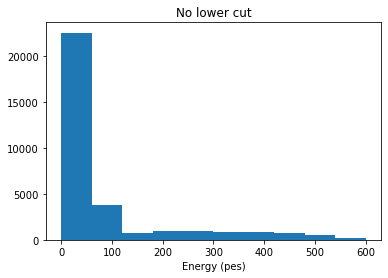

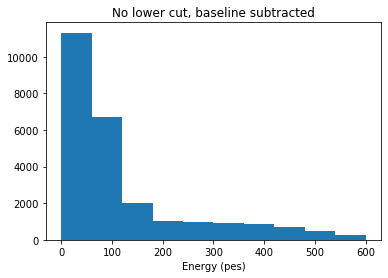

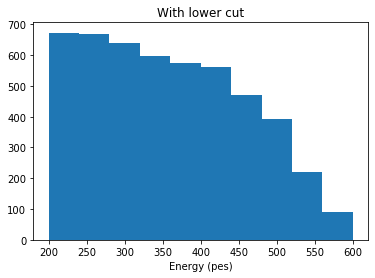

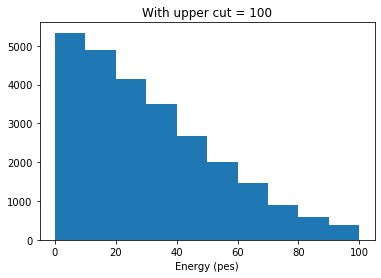

Fraction below cutoff = 77.6


In [79]:
plt.title('No lower cut')
plt.hist(events_energy, bins = 10, range = (0, Ecut[1]))
plt.xlabel('Energy (pes)')
plt.show()

plt.title('No lower cut, baseline subtracted')
plt.hist(events_energy_subtracted, bins = 10, range = (0, Ecut[1]))
plt.xlabel('Energy (pes)')
plt.show()

plt.title('With lower cut')
plt.hist(events_energy, bins = 10, range = (Ecut[0], Ecut[1]))
plt.xlabel('Energy (pes)')
plt.show()

low_energy_cutoff = 100
plt.title('With upper cut = '+str(low_energy_cutoff))
plt.hist(events_energy, bins = 10, range = (0, low_energy_cutoff))
plt.xlabel('Energy (pes)')
plt.show()

print('Fraction below cutoff =', round(100*len(events_energy[events_energy < low_energy_cutoff])/len(events_energy),1))

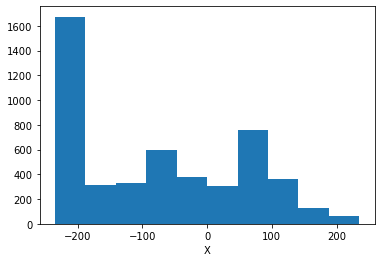

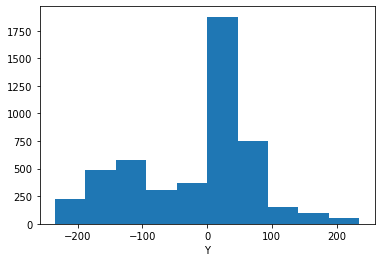

In [20]:
plt.hist(all_Xs[Emask])
plt.xlabel('X')
plt.show()

plt.hist(all_Ys[Emask])
plt.xlabel('Y')
plt.show()

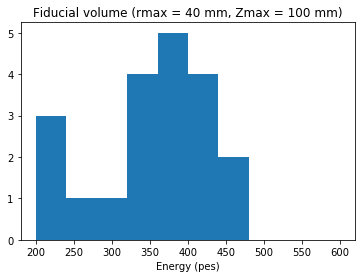

In [21]:
rmax = 40
fid = Emask & ((all_Xs**2 + all_Ys**2) < rmax**2) & (all_Zgauss < 100)
plt.title('Fiducial volume (rmax = 40 mm, Zmax = 100 mm)')
plt.hist(events_energy[fid], bins = 10, range = (Ecut[0], Ecut[1]))
plt.xlabel('Energy (pes)')
plt.show()

In [22]:
# A circle with radius R can inscribe a square of diagonal 2R, and the sides obey
# a2 + a2 = c2 = (2R)2 = 4R2
# So 2a2 = 4R2 => a = sqrt(2) R
# Thus, the min and max x and y are R / sqrt(2)

In [23]:
R = 200
boundaries = np.linspace(-R / sqrt(2), R / sqrt(2), 6)
intervals = [ (round(boundaries[i],1), round(boundaries[i+1],1)) for i in range(len(boundaries) - 1)]

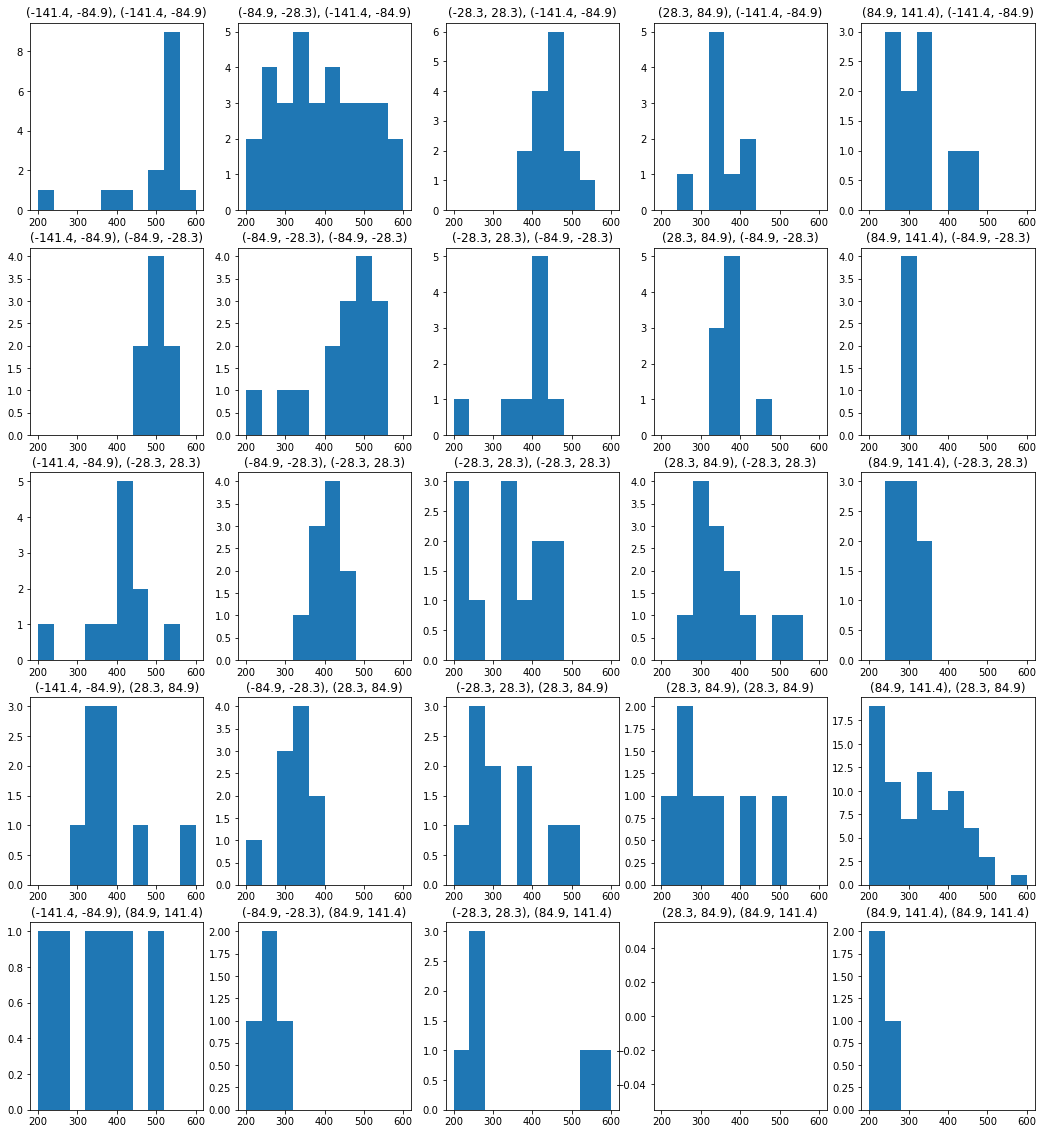

In [24]:
fig, axs = plt.subplots(len(intervals), len(intervals), figsize=(18, 20))

for ix in range(len(intervals)):
    for iy in range(len(intervals)):
        xr = intervals[ix]
        yr = intervals[iy]
        region = Emask & (xr[0] < all_Xs) & (all_Xs < xr[1]) & (yr[0] < all_Ys) & (all_Ys < yr[1]) & (all_Zgauss < 100)
        axs[iy, ix].hist(events_energy[region], range = (Ecut[0], Ecut[1]))
        axs[iy, ix].set_title(str(xr)+', '+str(yr))

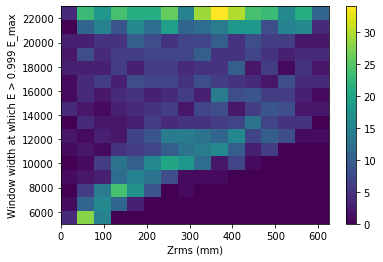

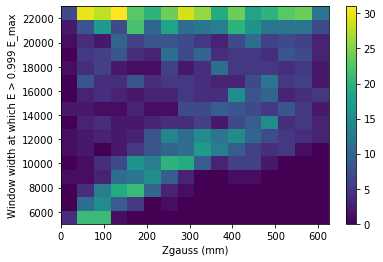

In [26]:
window_range = (5000, 23000)
bins = (16, 16)
zrange = (0, 625)

hrms = plt.hist2d(all_Zrms[Emask], all_energy_cutoffs_999[Emask], bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zrms (mm)')
plt.ylabel('Window width at which E > 0.999 E_max')
plt.colorbar(hrms[3])
plt.show()

hgauss = plt.hist2d(all_Zgauss[Emask], all_energy_cutoffs_999[Emask], bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zgauss (mm)')
plt.ylabel('Window width at which E > 0.999 E_max')
plt.colorbar(hgauss[3])
plt.show()

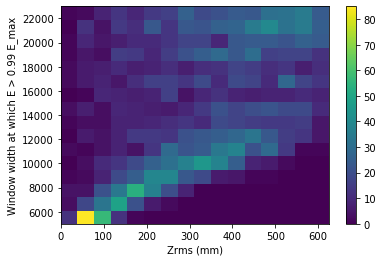

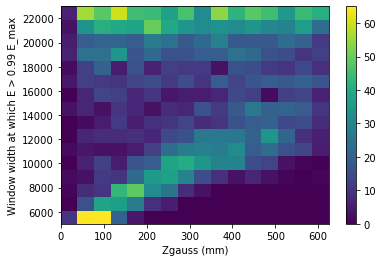

In [27]:
hrms = plt.hist2d(all_Zrms[Emask], all_energy_cutoffs_99[Emask], bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zrms (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.colorbar(hrms[3])
plt.show()

hgauss = plt.hist2d(all_Zgauss[Emask], all_energy_cutoffs_99[Emask], bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zgauss (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.colorbar(hgauss[3])
plt.show()

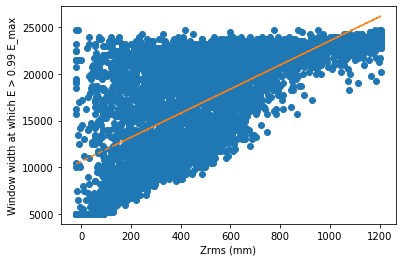

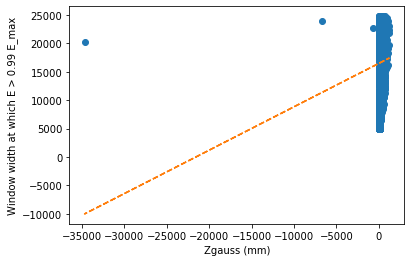

In [28]:
p = np.polyfit(all_Zrms[Emask], all_energy_cutoffs_99[Emask], 1)
line = np.array(all_Zrms)*p[0] + p[1]
plt.xlabel('Zrms (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.plot(all_Zrms[Emask], all_energy_cutoffs_99[Emask], 'o')
plt.plot(all_Zrms, line, '--')
plt.show()

p = np.polyfit(all_Zgauss[Emask], all_energy_cutoffs_99[Emask], 1)
line = np.array(all_Zgauss[Emask])*p[0] + p[1]
plt.xlabel('Zgauss (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.plot(all_Zgauss[Emask], all_energy_cutoffs_99[Emask], 'o')
plt.plot(all_Zgauss[Emask], line, '--')
plt.show()

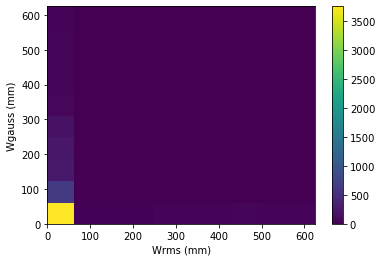

In [29]:
hW = plt.hist2d(all_Wrms, all_Wgauss, range = (zrange, zrange))
plt.xlabel('Wrms (mm)')
plt.ylabel('Wgauss (mm)')
plt.colorbar(hW[3])
plt.show()

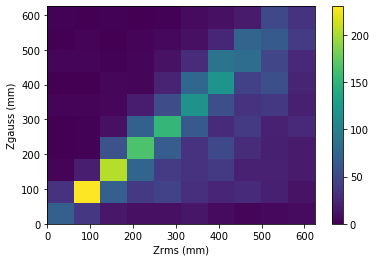

In [30]:
hZ = plt.hist2d(all_Zrms[Emask], all_Zgauss[Emask], range = (zrange, zrange))
plt.xlabel('Zrms (mm)')
plt.ylabel('Zgauss (mm)')
plt.colorbar(hZ[3])
plt.show()

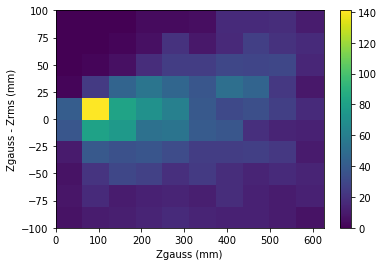

In [31]:
all_dZ = np.array(all_Zgauss[Emask]) - np.array(all_Zrms[Emask])
dzrange = (-100, 100)
hdZ = plt.hist2d(all_Zgauss[Emask], all_dZ, range = (zrange, dzrange))
plt.xlabel('Zgauss (mm)')
plt.ylabel('Zgauss - Zrms (mm)')
plt.colorbar(hdZ[3])
plt.show()

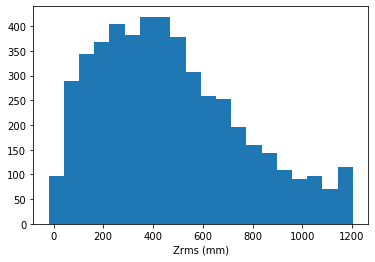

In [32]:
plt.hist(all_Zrms[Emask], bins = 20)
plt.xlabel('Zrms (mm)')
plt.show()

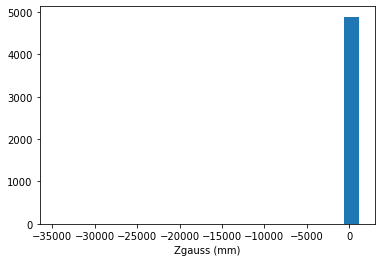

In [33]:
plt.hist(all_Zgauss[Emask], bins = 20)
plt.xlabel('Zgauss (mm)')
plt.show()

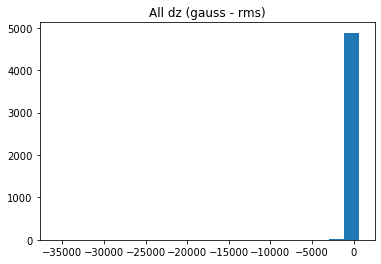

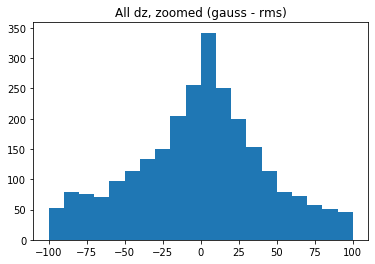

In [34]:
dZ = all_Zgauss[Emask] - all_Zrms[Emask]

plt.hist(dZ, bins = 20)
plt.title('All dz (gauss - rms)')
plt.show()

plt.hist(dZ, bins = 20, range = (-100, 100))
plt.title('All dz, zoomed (gauss - rms)')
plt.show()

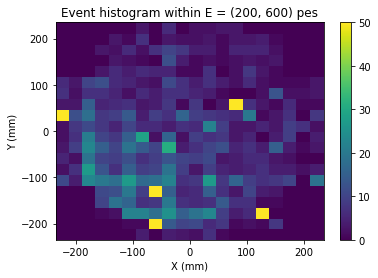

In [37]:
hxy = plt.hist2d(all_Xs[Emask], all_Ys[Emask], bins = 20, vmax = 50)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Event histogram within E = '+str(Ecut)+' pes, cut off')
plt.colorbar(hxy[3])
plt.show()

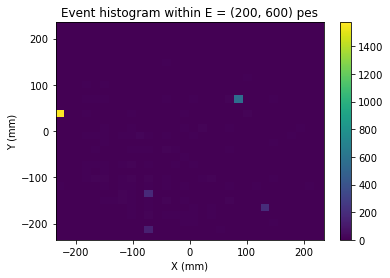

In [41]:
hxy = plt.hist2d(all_Xs[Emask], all_Ys[Emask], bins = 30)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Event histogram within E = '+str(Ecut)+' pes')
plt.colorbar(hxy[3])
plt.show()

In [40]:
ntotal  = len(events_sumwf)
nselect = len(events_sumwf[Emask])
selper  = round(100 * nselect / ntotal, 1)
print('Number of total events    =', ntotal)
print('Number of selected events =', nselect)
print('Selected percent          =', selper, '%')

Number of total events    = 33286
Number of selected events = 4893
Selected percent          = 14.7 %


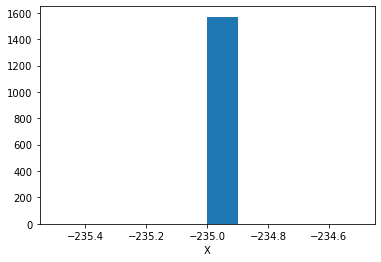

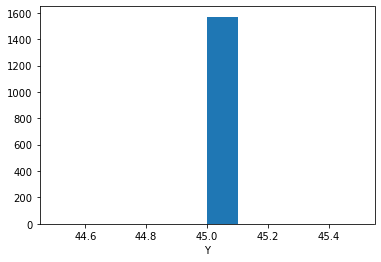

In [55]:
xycut = Emask & (all_Xs == -235.0) & (all_Ys == 45.0)

plt.hist(all_Xs[xycut])
plt.xlabel('X')
plt.show()

plt.hist(all_Ys[xycut])
plt.xlabel('Y')
plt.show()

In [56]:
print(all_Xs[xycut])
print(all_Ys[xycut])

[-235. -235. -235. ... -235. -235. -235.]
[45. 45. 45. ... 45. 45. 45.]


In [57]:
# There is a strange peak in xy at
# X = -235, Y = 45. Obviously this is
# a single SiPM. But why?

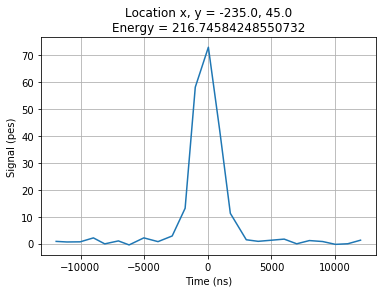

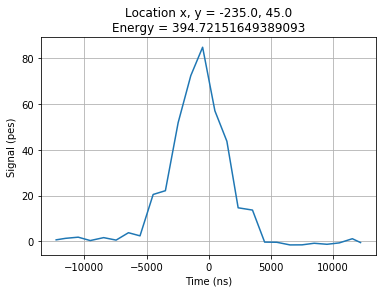

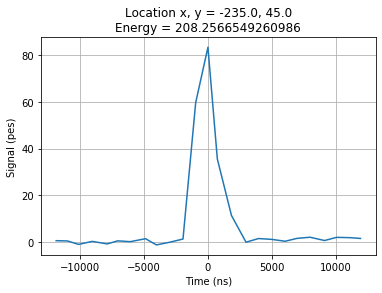

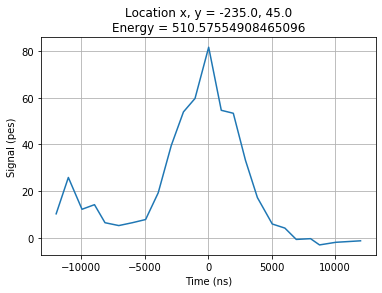

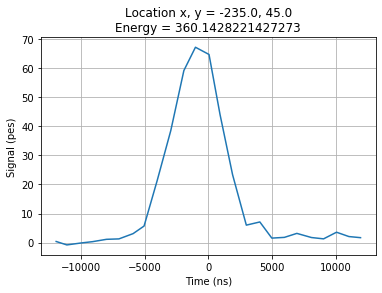

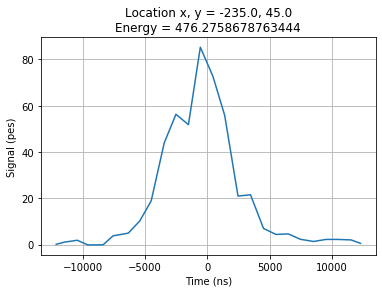

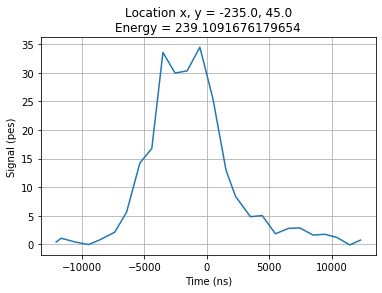

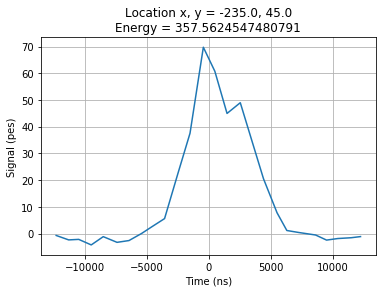

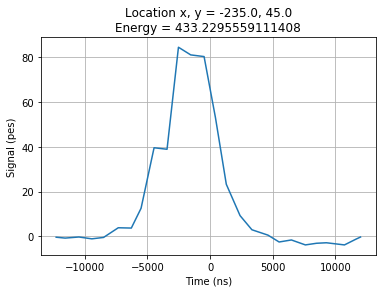

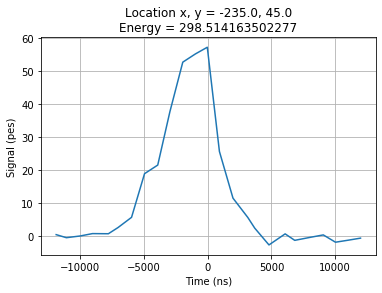

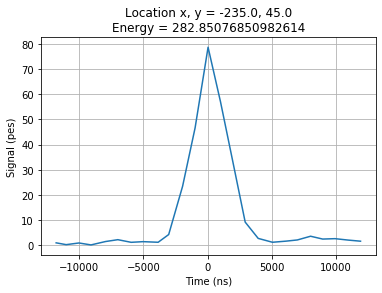

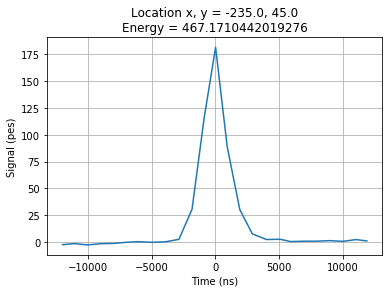

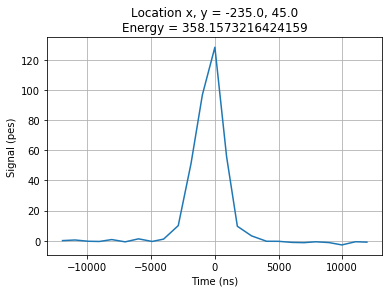

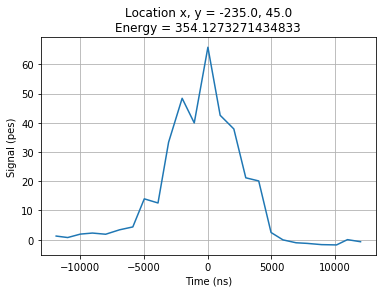

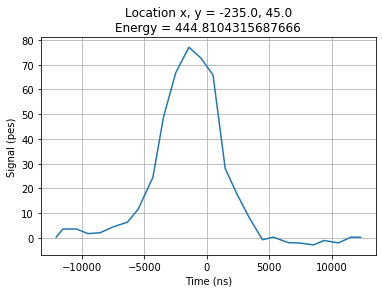

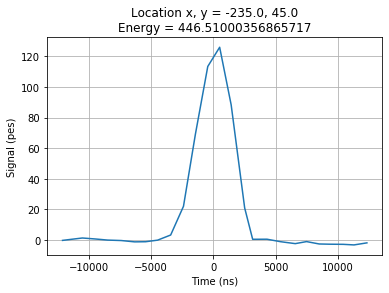

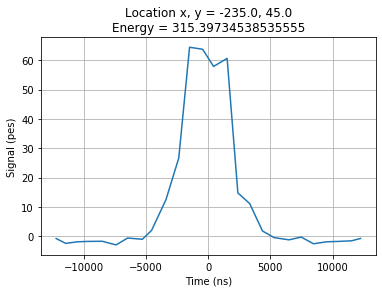

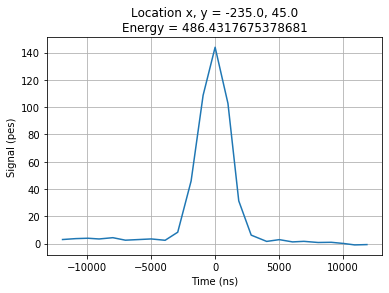

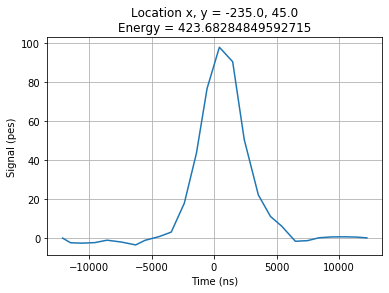

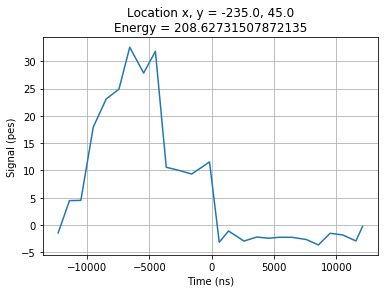

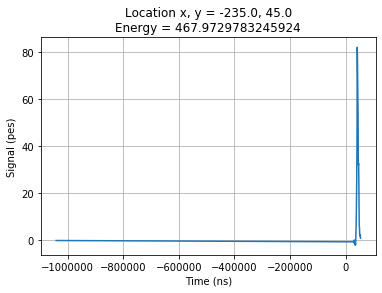

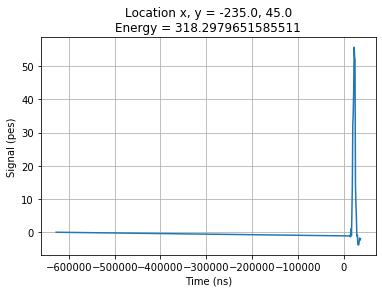

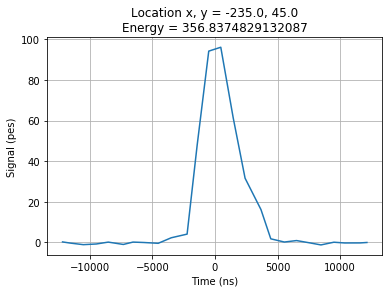

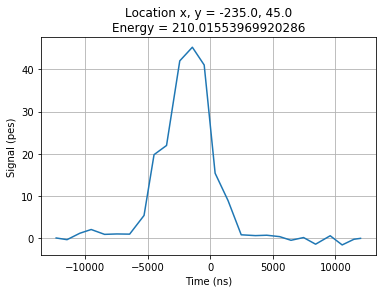

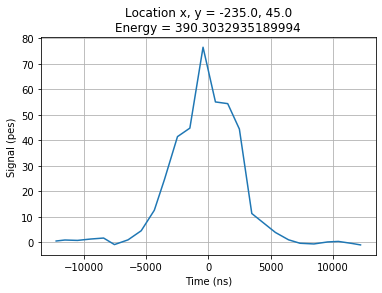

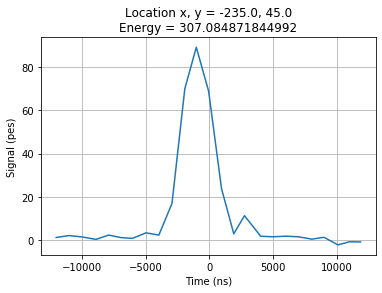

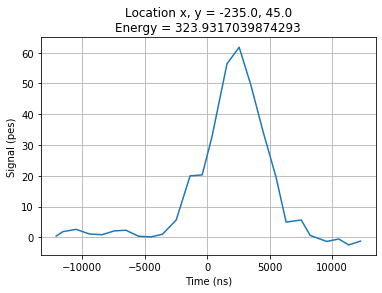

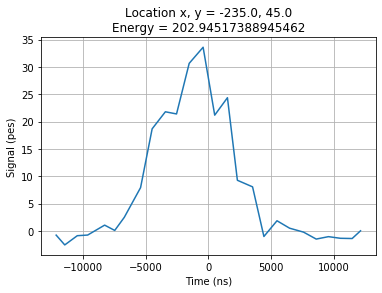

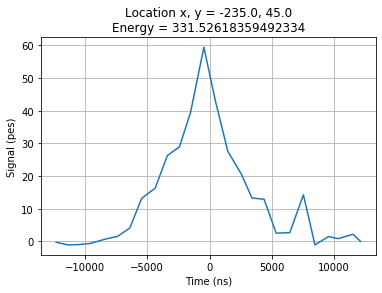

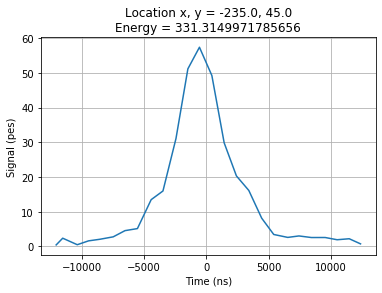

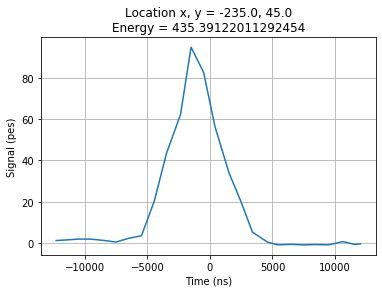

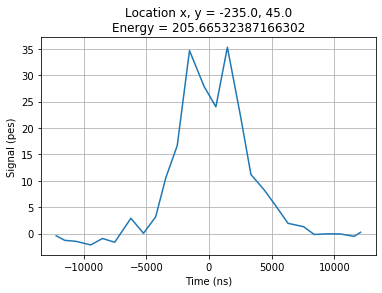

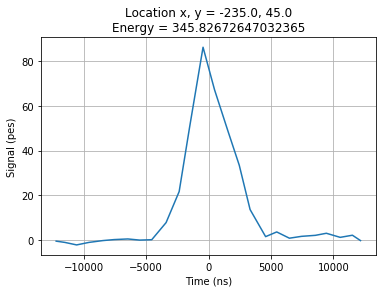

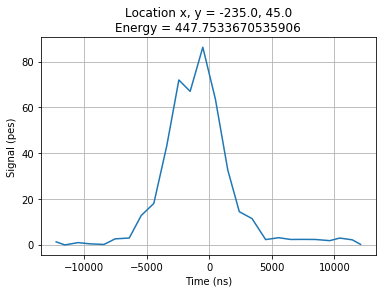

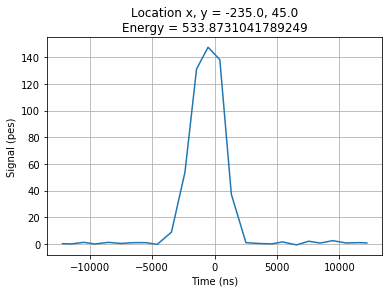

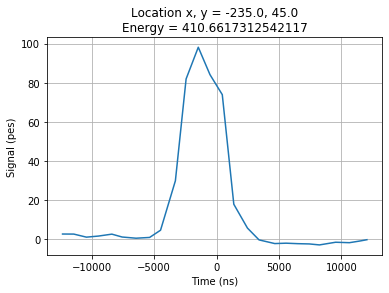

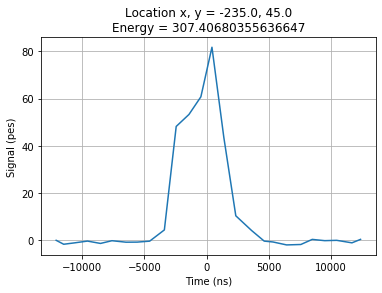

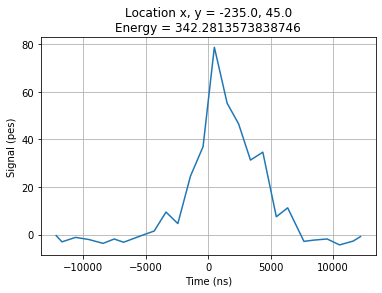

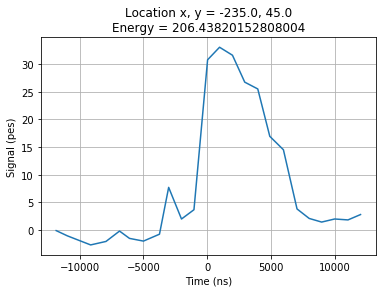

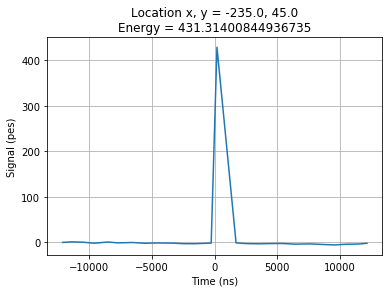

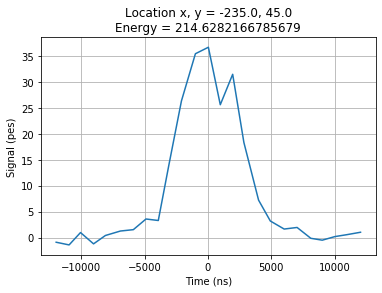

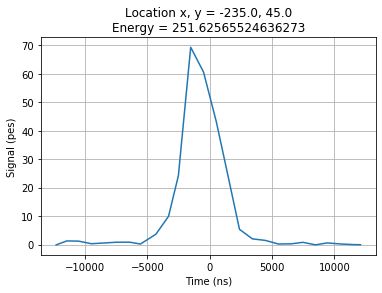

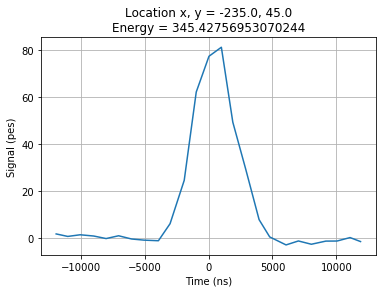

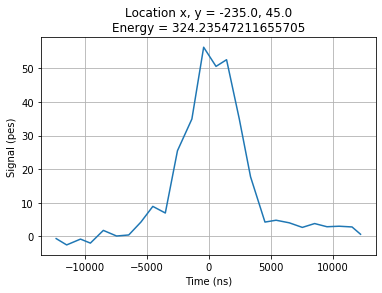

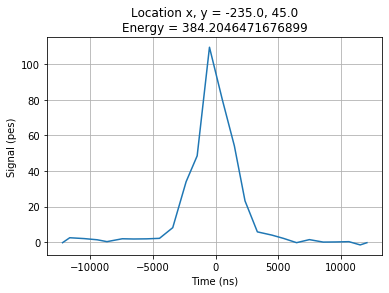

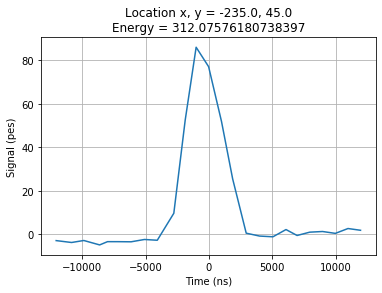

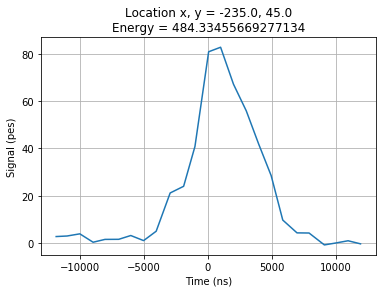

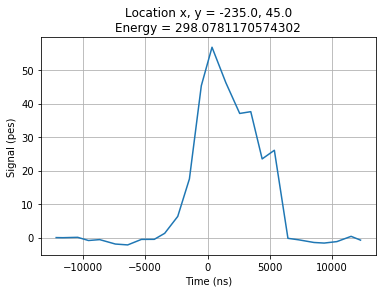

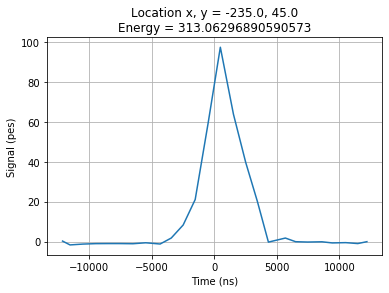

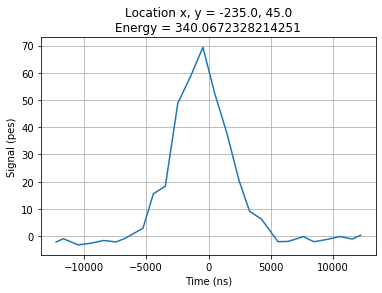

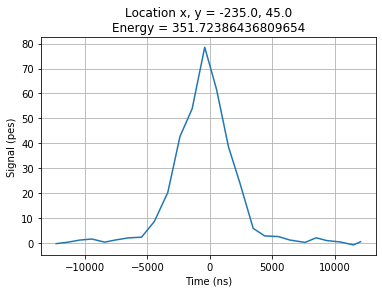

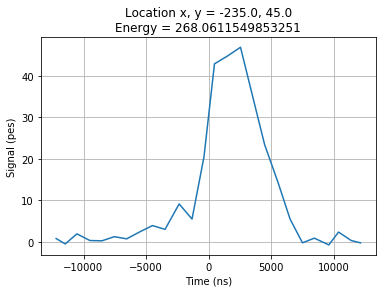

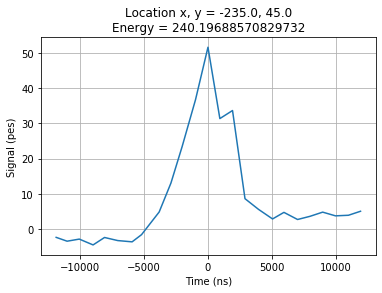

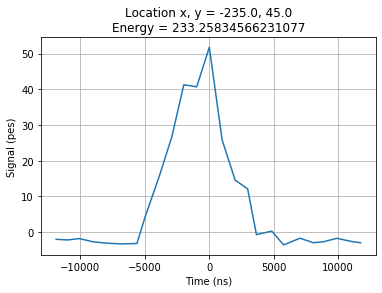

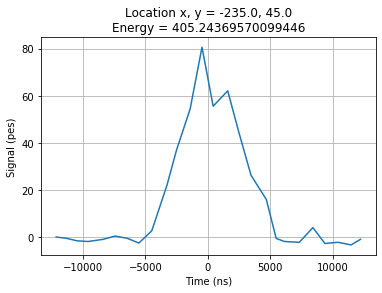

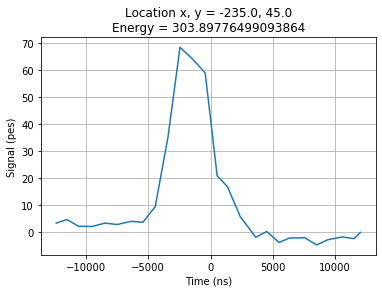

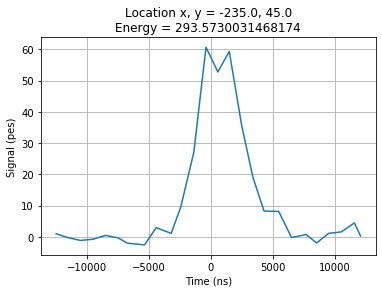

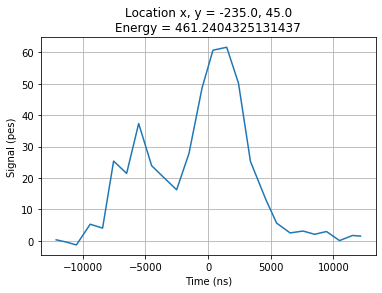

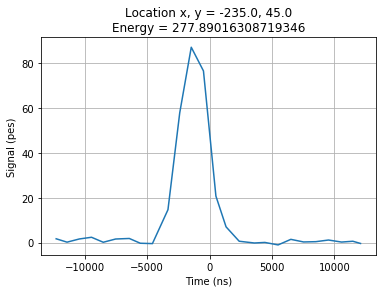

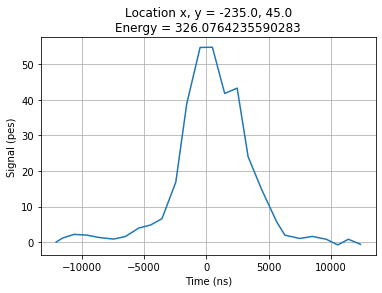

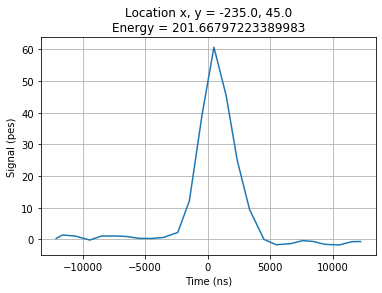

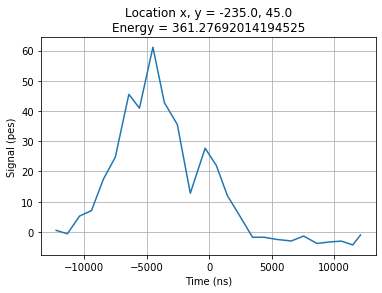

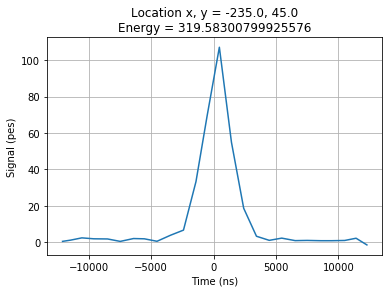

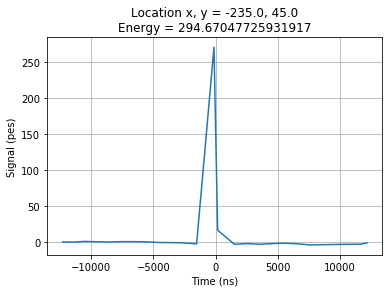

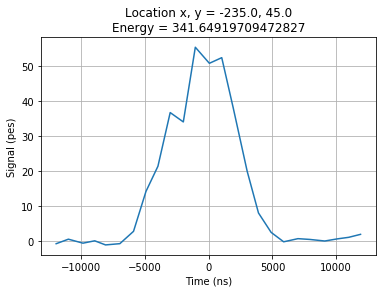

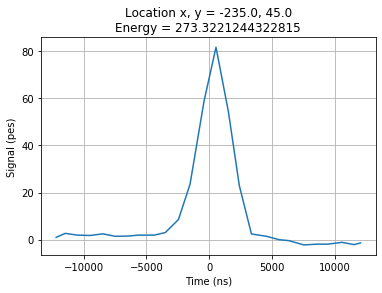

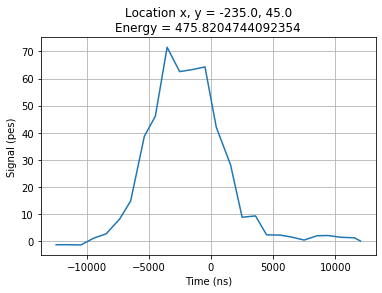

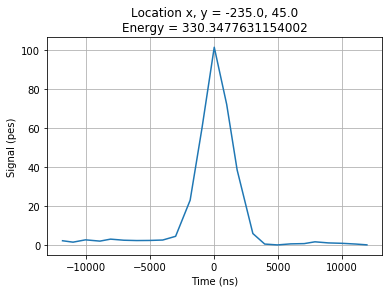

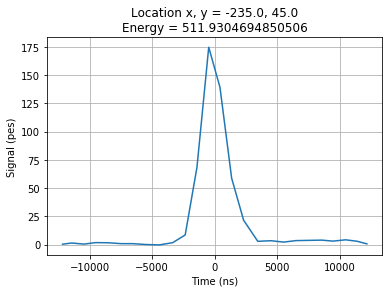

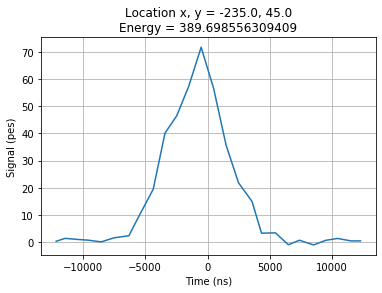

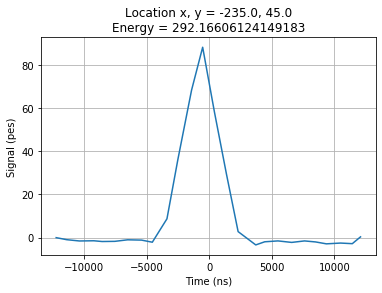

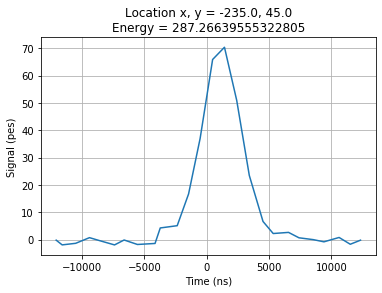

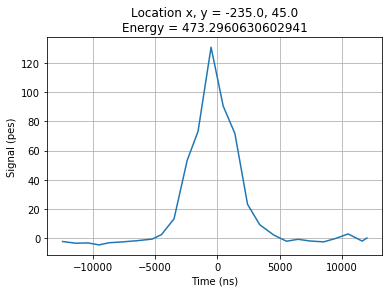

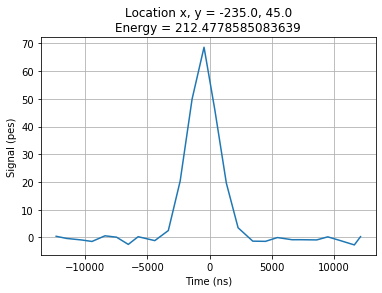

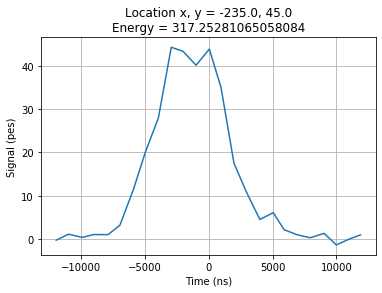

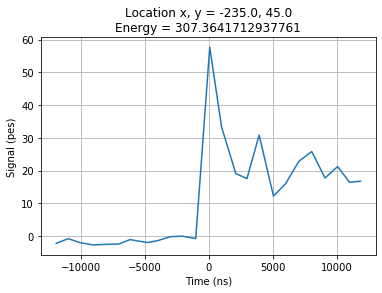

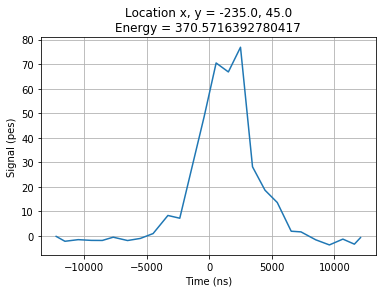

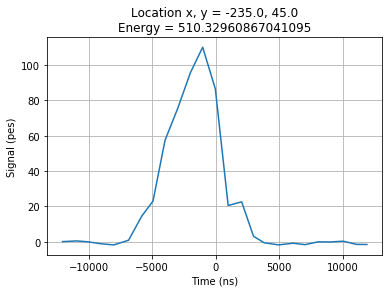

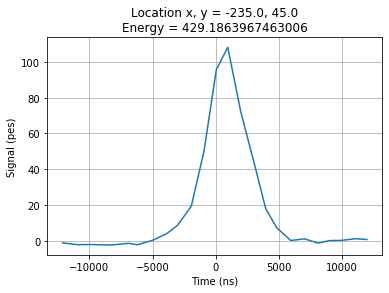

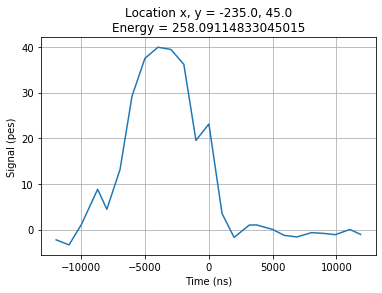

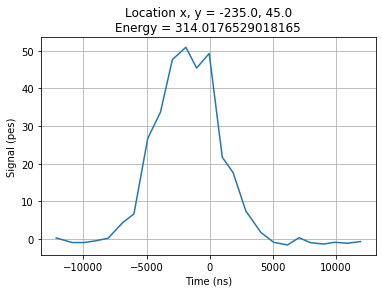

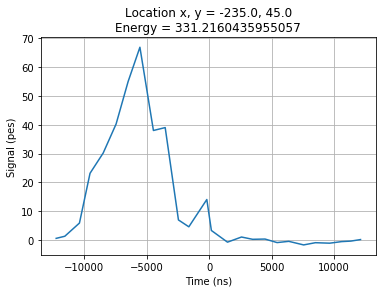

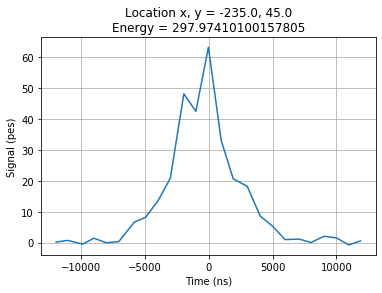

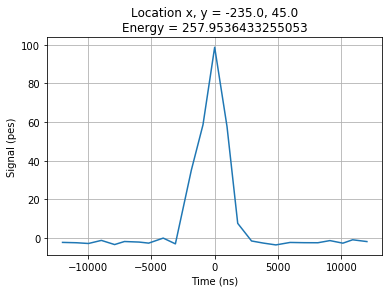

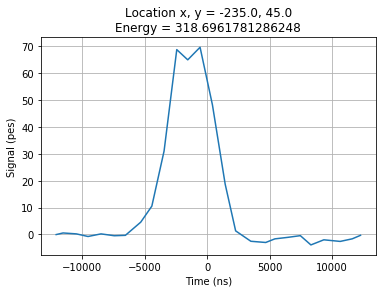

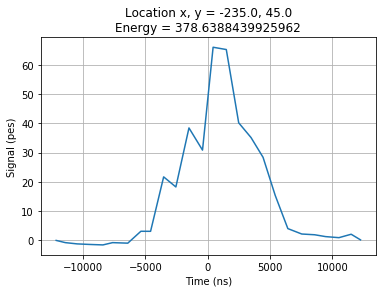

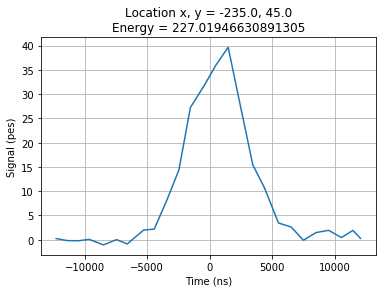

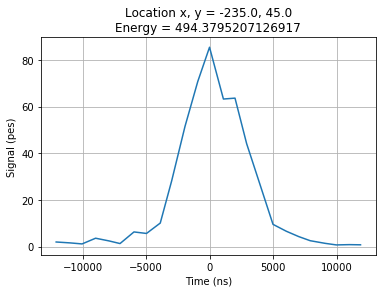

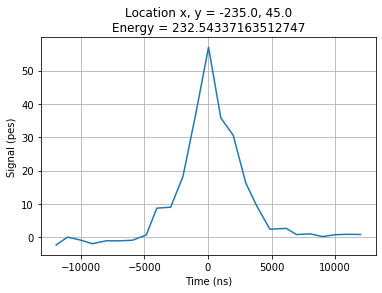

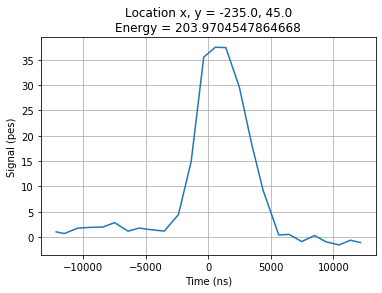

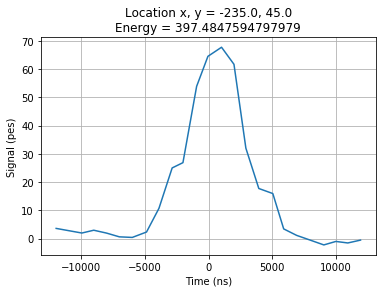

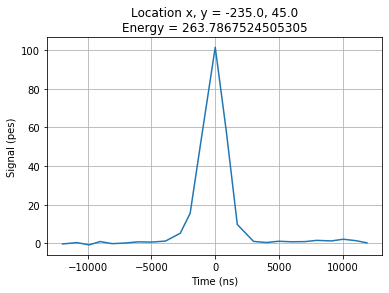

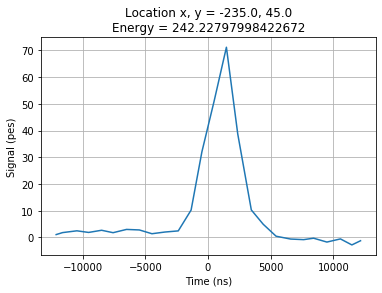

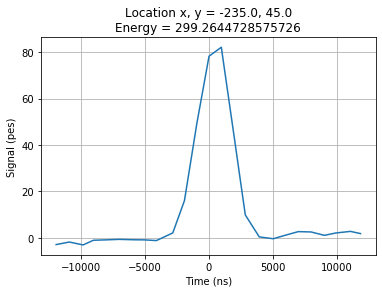

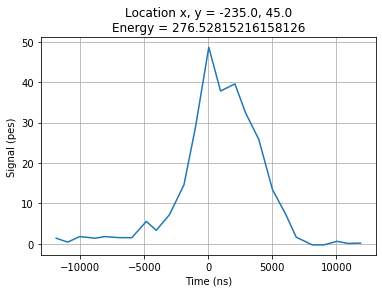

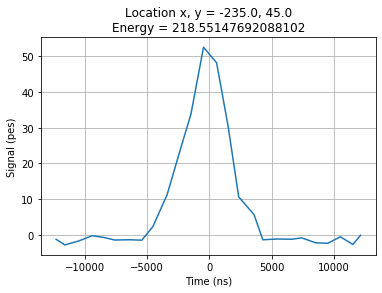

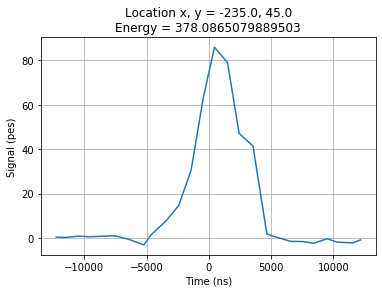

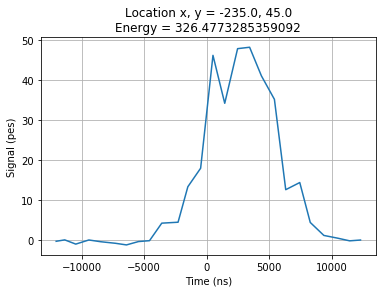

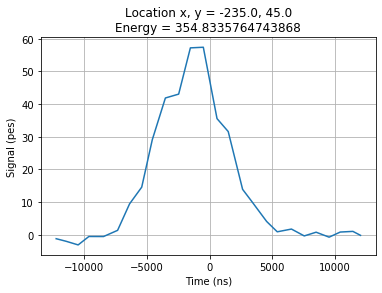

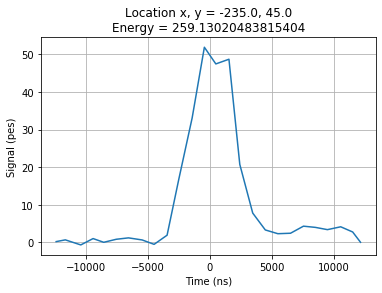

In [70]:
maxshow = 100
shown = 0

for ievt in range(len(events_sumwf)):
    
    if xycut[ievt] and shown < maxshow:

        shown += 1
        
        # Plot the waveform
        plt.xlabel('Time (ns)')
        plt.ylabel('Signal (pes)')
        plt.title('Location x, y = '+str(all_Xs[ievt])+', '+str(all_Ys[ievt])+'\nEnergy = '+str(events_energy[ievt]))
        plt.plot(events_times[ievt] - np.mean(events_times[ievt]), events_sumwf[ievt])
        plt.grid(True)
        plt.show()

In [69]:
nsamples = np.mean(np.array(events_times[0][1:]) - np.array(events_times[0][:len(events_times[0]) - 1])) / ns_per_sample
print('Typical num samples per time bin =', nsamples)

Typical num samples per time bin = 39.61444378470643


In [76]:
all_Wgauss[all_Zgauss < 0]

array([4.00517125e+03, 4.34915483e+03, 7.02663759e+03, ...,
       9.82339660e+03, 6.54543688e+03, 6.00268983e-06])

In [75]:
min(all_Zgauss)

-706784591357445.6

In [74]:
exp_dt(-128)

-2795387665.4753284